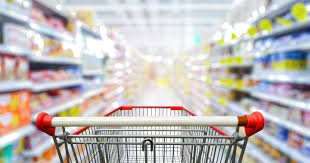

# **1. Latar Belakang Masalah**
Sebuah perusahaan retail yaitu supermarket yang dimiliki oleh **klien** atau seterusnya disebut **pihak pertama** memiliki dan adanya redundasi stock atau *non moving goods* yang ternyata membuat *warehouse management inventory* tidak efektif, akibat tidak tepat sasaran iklan atau promosi terhadap sebuah grup atau kelompok kustomer tertentu. Biaya Operasional atau fixed cost yang dapat di kurangi dari segi warehousing juga merupakan challenge tersendiri untuk penyediaan produk yang memerlukan cold storage dengan beban listrik yang besar.

**pihak pertama** membutuhkan langkah aplikatif yang dapat diterapkan untuk mengakomodasi penjualan yang lebih spesifik terhadap kelompok kustomer tertentu. agar biaya operasional dapat di kurangi dari *warehouse management inventory* dapat teralihkan ke sektor yang lebih menunjang penjualan.


## **1.1 Pernyataan Masalah dan Batasan Kondisi**

Kami selaku **Karmana Business Analyst** atau seterusnya disebut sebagai **pihak kedua** akan **memberikan pelayanan berupa jasa analysis dan rekomendasi** terkait performa maupun perilaku kustomer terkait produk yang di jual oleh pihak pertama. diantaranya alokasi sumber daya, stock, penggunaan iklan maupun promosi serta efisiensi dari retensi kustomer.

Pada analysis kali ini kita akan fokuskan terhadap **Recency, Frequency dan Monetary atau RFM** sehingga kita dapat mengetahui segmentasi dari tiap customer serta memberikan suggestion atau saran yang dapat dilakukan ke tiap **segment** untuk rekomendasi **langkah aplikatif** yang dapat diterapkan untuk **meningkatkan sales beserta memperoleh customer retention yang lebih kuat dan baik**. 

Melalui data ini kita dapat melihat aktifitas customer dalam rentang waktu yang telah di tentukan yaitu pada hal ini adalah  spesifik terhadap **2 tahun periode perolehan data**




## **1.2 Data Set**

Berikut dibawah ini merupakan data set yang telah di berikan adalah berisikan 29 kolom yang berkaitan dengan data kustomer seperti, tahun kelahiran, tingkat pendidikan, status, pendapatan dan lain - lain. 



| # | Feature | Description
| --- | --- | --- 
| 1 | ID | Customer's unique identifier
| 2 | Year_Birth | Customer's birth year
| 3 | Education | Customer's education level
| 4 | Marital_Status | Customer's marital status
| 5 | Income | Customer's yearly household income
| 6 | Kidhome | Number of children in customer's household
| 7 | Teenhome | Number of teenagers in customer's household
| 8 | Dt_Customer | Date of customer's enrollment with the company
| 9 | Recency | Number of days since customer's last purchase
| 10 | Complain | 1 if the customer complained in the last 2 years, 0 otherwise
| 11 | MntWines | Amount spent on wine in last 2 years
| 12 | MntFruits | Amount spent on fruits in last 2 years
| 13 | MntMeatProducts | Amount spent on meat in last 2 years
| 14 | MntFishProducts | Amount spent on fish in last 2 years
| 15 | MntSweetProducts | Amount spent on sweets in last 2 years
| 16 | MntGoldProds | Amount spent on gold in last 2 years
| 17 | NumDealsPurchases | Number of purchases made with a discount
| 18 | AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
| 19 | AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
| 20 | AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
| 21 | AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
| 22 | AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
| 23 | Response | 1 if customer accepted the offer in the last campaign, 0 otherwise
| 24 | NumWebPurchases | Number of purchases made through the company’s website
| 25 | NumCatalogPurchases | Number of purchases made using a catalogue
| 26 | NumStorePurchases | Number of purchases made directly in stores
| 27 | NumWebVisitsMonth | Number of visits to company’s website in the last month
| 28 | Z_CostContact | -
| 29 | Z_Revenue | -

notes: data original dari **pihak pertama**

# **2. Data Base Standardization / Data Formatting & Data Cleaning**
Saat membuka file excel data base tidak memiliki separasi yang benar diantara kolum atau disimpan dalam 1 kolum dengan tab separated values.

maka ktia dapat membubuhkan "sep='\t'" ditambahkan di function read_csv agar data dapat di identifikasi dengan lebih mudah untuk di analysis

Untuk melakukan identifikasi  kita sebelumnya memerlukan beberapa import syntax agar python dapat mengenali jenis data sehingga dapat kita dapat lakukan investigasi lebih lanjut

In [2]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

Melakukan pembacaan data dari excel file "Supermarket Customers.csv"

In [3]:
df = pd.read_csv("Supermarket Customers.csv", sep='\t')

In [4]:
print(f'Jumlah baris dan kolom dalama dataset df adalah {df.shape}')

Jumlah baris dan kolom dalama dataset df adalah (2240, 29)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Melihat sebaran data, beserta data dengan datatype object
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
# melihat seluruh kolumn yang tersedia
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
# memunculkan nilai unik dari masing masing kolom dan identifikasi missing value dari kolom
pd.set_option('max_colwidth', 1)

kolom=[]
null=[]
jumlah=[]
unik_sample=[]

for i in df.columns:
    kolom.append([i])
    null.append(df[i].isna().sum())
    jumlah.append(df[i].nunique())
    unik_sample.append(df[i].unique())
df_series = {'kolom':kolom,
             'null' :null,
             'jumlah': jumlah,
             'unik_sample':unik_sample}

df_table = pd.DataFrame(df_series)

df_table

,kolom,null,jumlah,unik_sample
0,[ID],0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,[Year_Birth],0,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,[Education],0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,[Marital_Status],0,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,[Income],24,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,[Kidhome],0,3,"[0, 1, 2]"
6,[Teenhome],0,3,"[0, 1, 2]"
7,[Dt_Customer],0,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,[Recency],0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,[MntWines],0,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 4

- terdapat kolom missing value pada income sebanyak 24 rows

- terdapat data yang perlu di standardkan yaitu, marital status, education 

- terdapat 2 kolom yang tidak memiliki purpose dan value yang tidak revelan yaitu `Z_CostContact` dan `Z_Revenue`

## 2.1 Pengecekan Missing Value 

Setelah di lakukan checking, terdapat 24 missing value dari kolom income, kita akan coba untuk mengisi missing value tersebut dengan median dari beberapa aspek yaitu  "education, marital_status, kidhome, teenhome", mengingat hal ini berkaitan juga dengan aktifitas belanja serta level ekonomi sebuah keluarga.

In [10]:
df[['Education', 'Marital_Status', 'Kidhome','Teenhome', 'Dt_Customer', 'Recency', 'Income']].sort_values(by='Income', ascending=False)


,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,Income
2233,Graduation,Together,1,0,02-06-2013,23,666666.0
617,PhD,Together,1,1,03-06-2013,31,162397.0
687,PhD,Married,0,0,04-08-2012,21,160803.0
1300,Master,Together,1,0,04-06-2013,37,157733.0
164,PhD,Married,0,1,01-03-2014,98,157243.0
...,...,...,...,...,...,...,...
2078,Graduation,Married,1,1,03-03-2013,82,NaN
2079,Master,Together,0,1,23-06-2013,83,NaN
2081,Graduation,Single,0,1,18-10-2013,95,NaN
2084,Master,Widow,0,0,30-10-2013,75,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Maka nilai ini kita simpan sebagai sebuah kondisi terhadap income, dapat terlihat sebagai ilustrasi berdasarkan kondisi grouping nilai median customer dengan level pendidikan PhD, status menikah, mempunyai anak kecil 2 dan remaja 1 memiliki income median 52.360.
<br>
<br>
tentunya nilai bervariasi berdasarkan masing masing kondisi yang telah kita grouping sebelumnya

In [12]:
test = df.groupby(['Education', 'Marital_Status', 'Kidhome','Teenhome'])['Income'].median()
test

Education  Marital_Status  Kidhome  Teenhome
2n Cycle   Divorced        0        0           64852.0
                                    1           62168.5
                           1        0           31163.0
                                    1           31395.0
           Married         0        0           71779.5
                                                 ...   
PhD        Together        2        1           52360.0
           Widow           0        0           76842.0
                                    1           54111.0
                           1        1           45945.5
           YOLO            0        1           48432.0
Name: Income, Length: 135, dtype: float64

In [13]:
df.groupby(['Education', 'Marital_Status', 'Kidhome','Teenhome'],sort=False)['Income'].transform(lambda x: x.fillna(x.median()))

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [14]:
df["Income"] = df.groupby(['Education', 'Marital_Status', 'Kidhome','Teenhome'],sort=False)['Income'].transform(lambda x: x.fillna(x.median()))

Dibawah ini adalah melakukan check ulang terhadap jumlah missig value apakah masih ada atau tidak.
ditemukan 1 buah nilai dengan ID 7244 memiliki ketidak samaan pattern dengan pola grouping yang telah kita tetapkan sebelumnya. action yang akan di lakukan adalah melakukan drop row terhadap value ini

In [15]:
# memperoleh 1 value yang pattern nya tidak mengikuti groupby yang ada di atas di rekomendasikan untuk di hapus
df.query("Income.isna()")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0


In [16]:
# menghapus missing value di kolom income yang tidak cocok dengan pattern yang kita buat.
drop_mv = df.loc[[48]].index
drop_mv

Index([48], dtype='int64')

In [17]:
df.drop(drop_mv, inplace=True)

## 2.2 Pengecekan Kolom yang tidak relevan

karena tidak memiliki relevansi yang spesifik dengan kolom lainnya, maka kita akan melakukan hapus kolom kedua dibawah ini

In [18]:
print(f'jumlah baris dan kolom semula {df.shape}')

jumlah baris dan kolom semula (2239, 29)


nilai yang ada didalam kedua kolom ini adalah numerik yaitu 3 dan 11.

In [19]:
df[['Z_CostContact', 'Z_Revenue']].value_counts()

Z_CostContact  Z_Revenue
3              11           2239
Name: count, dtype: int64

In [20]:
df.drop(columns=df[['Z_CostContact', 'Z_Revenue']], inplace=True)

In [21]:
print(f'jumlah baris dan kolom setelah delete 2 kolom `Z_CostContact`, `Z_Revenue` {df.shape}')

jumlah baris dan kolom setelah delete 2 kolom `Z_CostContact`, `Z_Revenue` (2239, 27)


## 2.3 Pencarian duplicated data

Secara umum apabila menggunakan function **duplicated().sum()** nilai yang terbaca adalah 0, namun kita akan coba perdalam pencarian dengan tidak menyertakan ID, Response.

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df['ID'].nunique

<bound method IndexOpsMixin.nunique of 0       5524 
1       2174 
2       4141 
3       6182 
4       5324 
        ...  
2235    10870
2236    4001 
2237    7270 
2238    8235 
2239    9405 
Name: ID, Length: 2239, dtype: int64>

karena ID ini merupakan unique identifiers atau pengenal, tidak relevan apabila dimasukan kedalam pencarian duplicated items, serta response memiliki inconsistent data dapat terlihat dari number of accepted promotion. 

In [24]:
df.duplicated(subset=df.drop(columns=['ID','Response'])).sum()

np.int64(201)

In [25]:
df.drop_duplicates(subset=df.drop(columns=['ID','Response']),inplace=True)

In [26]:
print(f'Maka jumlah baris dan kolom setelah spesifik duplicated items dihapus adalah sebanyak {df.shape}')

Maka jumlah baris dan kolom setelah spesifik duplicated items dihapus adalah sebanyak (2038, 27)


In [27]:
print(f'data yang dipertahankan sebanyak {(2038/2240)*100:.2f} % ') 


data yang dipertahankan sebanyak 90.98 % 


# 3. Exploratory Data Analysis (EDA) dengan bantuan Visualisasi

- Melakukan Explorasi data dengan bantuan visualisasi dapat memungkinkan kita melihat perbedaan dengan lebih mudah serta melakukan aksi terhadap hal yang perlu diperhatikan seperti adanya outlier pada data tersebut. 
- kita dapat melihat distribusi umum dari tiap variable numerik dengan sebagai berikut

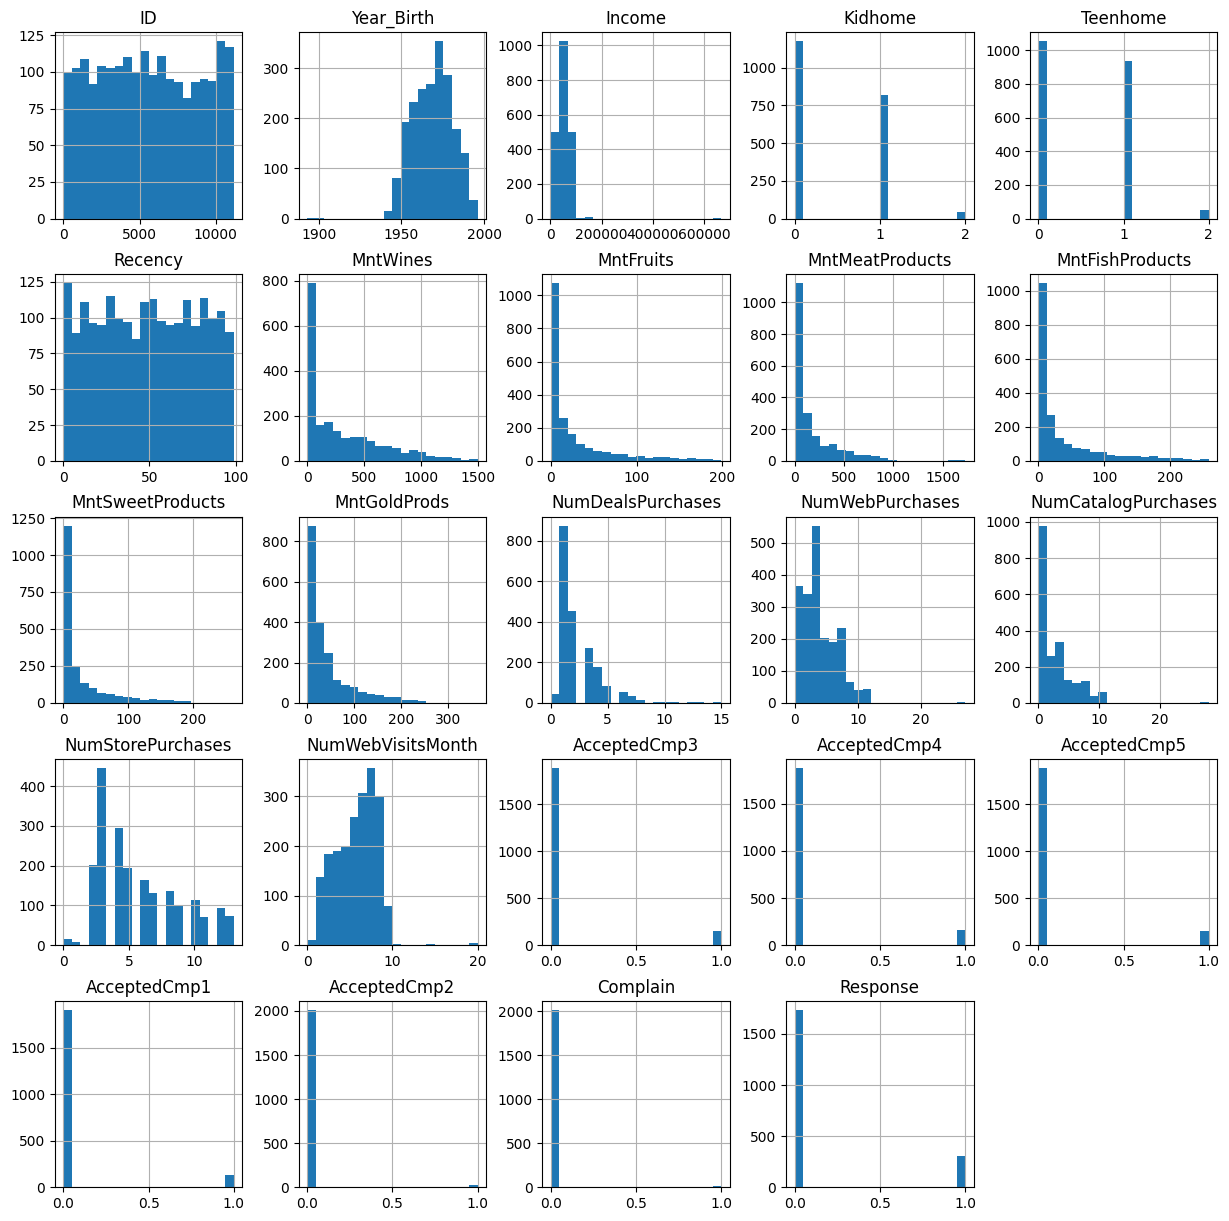

In [28]:
axList = df.hist(bins=20, figsize = (15, 15))

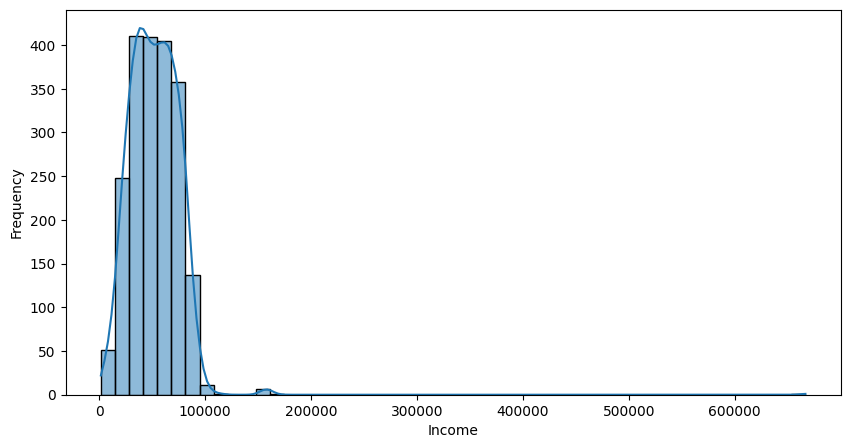

In [29]:
plt.figure(figsize=(10,5))

# melihat distribusi data income
sns.histplot(data=df, x='Income',bins=50, kde=True)

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Income')
plt.ylabel('Frequency')

# menampilkan grafik income saja
plt.show()

In [30]:
df['Income'].max()

np.float64(666666.0)

**Distribusi Data Income**
-   penggunaan boxplot memungkinkan kita lebih mudah dalam melihat persebaran data, utamanya kita ingin melihat adanya outlier dari data yang sedang kita investigasi. pada hal ini kita sudah melihat garis kurva dari KDE garis masih terlukis hingga value income > 600.000 

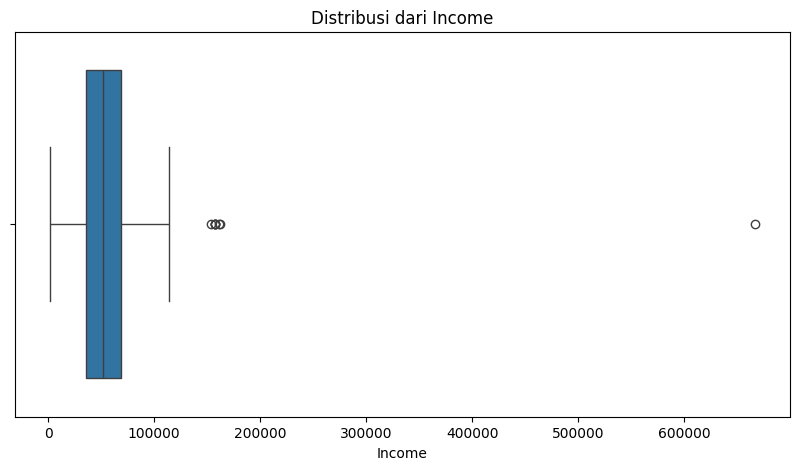

In [31]:
# menampilkan distribusi income melalui boxplot

plt.figure(figsize=(10,5))

# menampilkan boxplot data income by education 
sns.boxplot(data=df, x='Income')

plt.title('Distribusi dari Income')
plt.show()

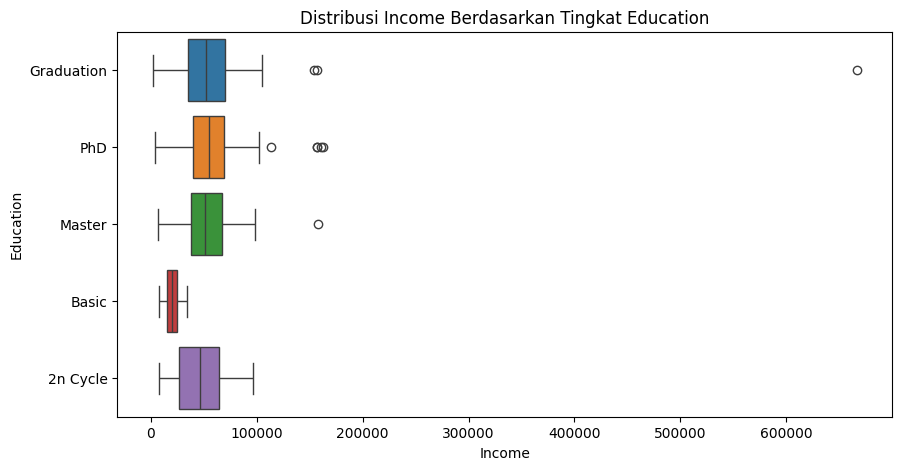

In [32]:
plt.figure(figsize=(10,5))

# menampilkan boxplot data income by education 
sns.boxplot(data=df, x='Income', y='Education', hue='Education')

plt.title('Distribusi Income Berdasarkan Tingkat Education')
plt.show()

**Insight**
-   nilai income memiliki outlier pada education level graduation yaitu sebesar 666.666
-   sebaran income meiliki data utamanya dibawah 200.000 



## 3.1 Menghapus Outlier `Income`

In [33]:
# terdapat 1 outlier yang memiliki income signifikan lebih besar dari lainnya yaitu 666666
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,1,3,6,0,0,0,0,0,0,0


In [34]:
# memperoleh index dari outlier income
drop_income = df[df['Income']>200000].index
drop_income

Index([2233], dtype='int64')

In [35]:
# melakukan drop spesifik terhadap outlier income
df.drop(drop_income, inplace=True)

In [36]:
# melakukan pengecekan apakah outlier telah terhapus
# nilai outlier pada index 2233 telah terhapus
df.loc[2231:2235]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,4,12,8,0,0,0,0,0,0,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,0,3,4,0,0,0,0,0,0,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0


<Axes: xlabel='Income'>

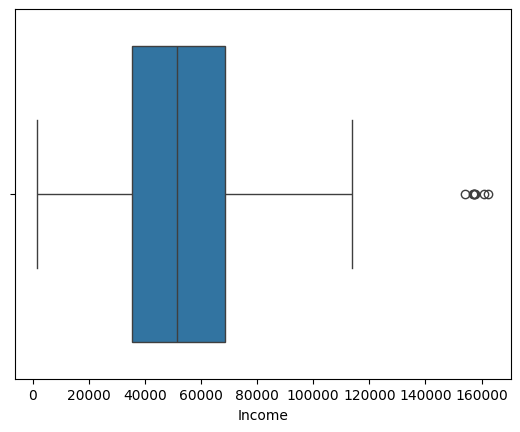

In [37]:
# pengecekan juga dapat dilihat dari boxplot dibawah berikut
sns.boxplot(data=df, x='Income')

Terdapat 8 jumlah data income yang lebih dari upperbound kita akan biarkan karena jumlahnya yang tidak terlalu banyak terhadap total data

In [38]:
df[df['Income']>120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,22,0,0,0,0,0,0,0,0,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,1,1,0,0,0,0,0,0,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,28,1,0,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,1,1,0,0,0,0,0,0,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,28,0,1,0,0,0,0,0,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,0,0,0


## 3.2 Menghapus Outlier `Year_Birth` (umur)

Melihat persebaran rerata umur adalah orang dengan kelahiran 1968 dari kolom `Year_Birth` kita dapat melakukan handling data terhadap beberapa probabilitas outlier umur yaitu adalah orang dengan keliharan dibawah nilai Q1 atau diluar rentang dimana data itu dominan tersebar.
<br>
Dapat terlihat melalui bantuan visualisasi Boxplot nilai sebaran data berada dalam rentang 1940 ~ 1990, maka kita dapat peroleh kondisi yang `Year_Birth` tidak relevan adalah `Year_Birth`< 1940

In [39]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2037.000000,2037.000000,2037.000000,2037.00000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,...,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,5588.994109,1968.772705,52021.112175,0.44379,0.507609,49.086402,303.601865,26.367698,167.887580,37.486500,...,2.660285,5.774669,5.309769,0.072656,0.076092,0.072165,0.065783,0.012764,0.009818,0.148748
std,3258.044654,11.981112,21544.611296,0.53686,0.546974,28.964316,335.877066,39.839829,228.002716,54.723402,...,2.937372,3.237608,2.439598,0.259635,0.265211,0.258824,0.247963,0.112282,0.098624,0.355927
min,0.000000,1893.000000,1730.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2802.000000,1959.000000,35544.000000,0.00000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5493.000000,1970.000000,51518.000000,0.00000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8430.000000,1977.000000,68397.000000,1.00000,1.000000,74.000000,504.000000,33.000000,230.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.00000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


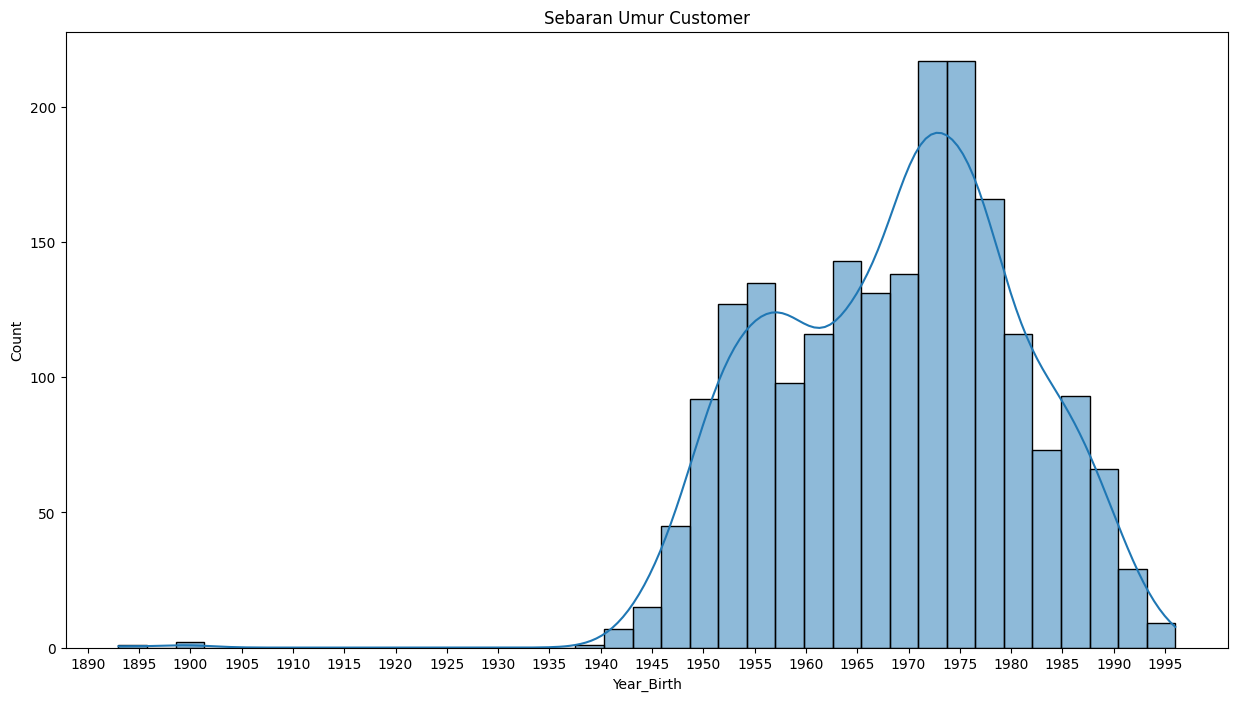

In [40]:
plt.figure(figsize=(15,8))

# melihat distribusi data income
sns.histplot(data=df, x='Year_Birth', kde=True)

# data mencover seluruh min dan max dari Year_Birth
plt.xticks(list(range(1890,2000,5)))


plt.title('Sebaran Umur Customer')
plt.show()


Melalui Boxplot outler lebih terlihat jelas, namun untuk melihat sebaran terbanyak kita juga dapat melihat histplot dari sebaran umur customer dari ilustrasi di atas, terlihat cukup jelas customer dengan mean umur di 1968, karena dominasi kelahiran terbanyak berkisar dari tahun 1968 hingga tahun 1978.

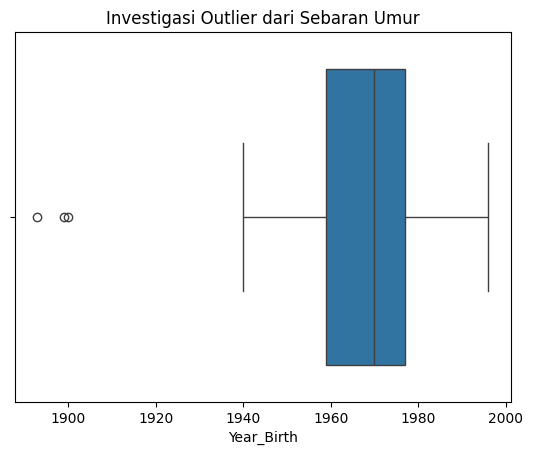

In [41]:
# melihat sebaran umur
# dengan mean sebesar 1968, dan memiliki min value yang cukup signifikan yaitu 1893, hal ini akan di handle dengan cara di remove

sns.boxplot(data=df, x='Year_Birth')
plt.title('Investigasi Outlier dari Sebaran Umur')
plt.show()

In [42]:
# terdapat 3 value yang akan di hapus
df[df['Year_Birth']<1940]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,6,4,1,0,0,1,0,0,0,0


In [43]:
# memperoleh index dari outlier umur
drop_umur = df[df['Year_Birth']<1940].index
drop_umur

Index([192, 239, 339], dtype='int64')

In [44]:
# menghapus outlier umur
df.drop(drop_umur, inplace=True)

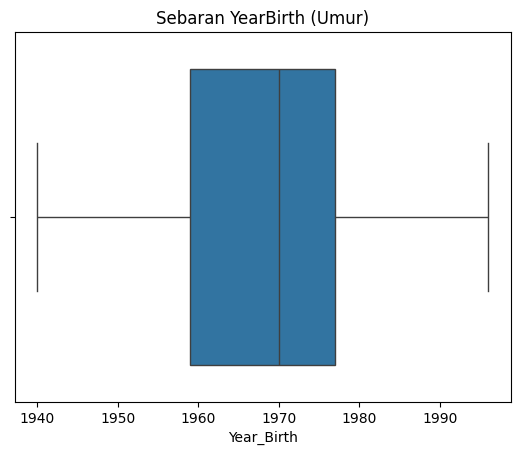

In [45]:
# data Year_Birth yang telah di cleaning
sns.boxplot(data=df, x='Year_Birth')

plt.title("Sebaran YearBirth (Umur)")

plt.show()

## 3.3 Mengubah standardisasi format `Dt_Customer`

In [46]:
# nilai Dt_Customer masih dalam tipe object (string)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2034 non-null   int64  
 1   Year_Birth           2034 non-null   int64  
 2   Education            2034 non-null   object 
 3   Marital_Status       2034 non-null   object 
 4   Income               2034 non-null   float64
 5   Kidhome              2034 non-null   int64  
 6   Teenhome             2034 non-null   int64  
 7   Dt_Customer          2034 non-null   object 
 8   Recency              2034 non-null   int64  
 9   MntWines             2034 non-null   int64  
 10  MntFruits            2034 non-null   int64  
 11  MntMeatProducts      2034 non-null   int64  
 12  MntFishProducts      2034 non-null   int64  
 13  MntSweetProducts     2034 non-null   int64  
 14  MntGoldProds         2034 non-null   int64  
 15  NumDealsPurchases    2034 non-null   int64 

In [47]:
# perubahan Dt_Customer menjadi datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [48]:
# melakukan check ulang format DtCustomer
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2034 non-null   int64         
 1   Year_Birth           2034 non-null   int64         
 2   Education            2034 non-null   object        
 3   Marital_Status       2034 non-null   object        
 4   Income               2034 non-null   float64       
 5   Kidhome              2034 non-null   int64         
 6   Teenhome             2034 non-null   int64         
 7   Dt_Customer          2034 non-null   datetime64[ns]
 8   Recency              2034 non-null   int64         
 9   MntWines             2034 non-null   int64         
 10  MntFruits            2034 non-null   int64         
 11  MntMeatProducts      2034 non-null   int64         
 12  MntFishProducts      2034 non-null   int64         
 13  MntSweetProducts     2034 non-null   i

## 3.4 Checking `Marital_Status`

Setelah dilakukan cek pada kolom `Marital_Status` kita dapat temui 3 tipe hal yang kurang sesuai untuk berada dalam kolom tersebut yaitu:
- Alone --> kita akan gabungkan ke single karena dua hal yang sama
- Absurd --> kita akan hilangkan karena tidak relevan
- YOLO  --> kita akan hilangkan karena tidak relevan
<br>
sementara untuk Absurd dan Yolo karena hanya total berjumlah 4 kita akan lakukan penghapusan data, untuk menyeregamkan tipe dari kolom `Marital_Status`

In [49]:
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    515
Single      443
Divorced    212
Widow       70 
Alone       3  
Absurd      2  
YOLO        1  
Name: count, dtype: int64

In [50]:
# mengganti Alone menjadi Single
df['Marital_Status']=np.where(df['Marital_Status']=='Alone', 'Single', df['Marital_Status'])

In [51]:
df[df['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0


In [52]:
df[df['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0


In [53]:
# 2177 index untuk YOLO, dan 2093 & 2134 untuk Absurd
drop_ms = df.loc[[2177, 2093, 2134]].index

In [54]:
df.drop(drop_ms, inplace=True)

Melakukan check ulang kolom `Marital_Status` saat ini hanya tersedia dengan tipe yang relevan

In [55]:
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    515
Single      446
Divorced    212
Widow       70 
Name: count, dtype: int64

## 3.5 Checking `Education` status vs `Income`

Status pendidikan di peroleh dari kolom `Education` dengan menggunakan value.counts() kita secara spesifik dapat melihat isi dari kolom tersebut dari beberapa tipe seprti yang ada dibawah ini: 
- Graduation
- PhD
- Master
- Basic
- 2n Cycle

kita akan melakukan penggabungan antara 2n Cycle dengan Master, mengingat kedua nya adalah hal yang serupa dalam level pendidikan.

In [56]:
df['Education'].value_counts()

Education
Graduation    1022
PhD           440 
Master        336 
2n Cycle      184 
Basic         49  
Name: count, dtype: int64

In [57]:
df[df['Education'] == 'Master']['Income'].mean()

np.float64(53036.130952380954)

In [58]:
df[df['Education'] == '2n Cycle']['Income'].mean()

np.float64(47185.782608695656)

In [59]:
df[df['Education'] == 'Graduation']['Income'].mean()

np.float64(52294.077299412915)

In [60]:
df[df['Education'] == 'PhD']['Income'].mean()

np.float64(56070.14431818182)

In [61]:
# kondisi untuk sort pada visualisasi dibawah
df.groupby("Education")["Income"].mean().sort_values(ascending=False)

Education
PhD           56070.144318
Master        53036.130952
Graduation    52294.077299
2n Cycle      47185.782609
Basic         19913.346939
Name: Income, dtype: float64

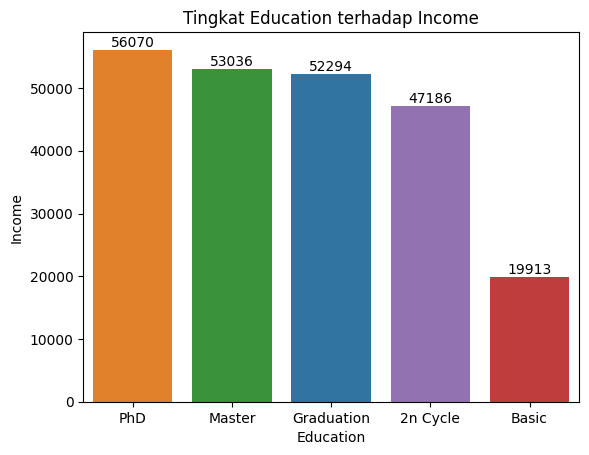

In [62]:
plots = sns.barplot(data=df, x='Education', y='Income', hue='Education', ci=0, order=df.groupby("Education")["Income"].mean().sort_values(ascending=False).index)

plt.title('Tingkat Education terhadap Income')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    


In [63]:
# mengganti 2n cycle menjadi master
df['Education']=np.where(df['Education']=='2n Cycle', 'Master', df['Education'])

In [64]:
df['Education'].value_counts()

Education
Graduation    1022
Master        520 
PhD           440 
Basic         49  
Name: count, dtype: int64

Melakukan cek apakah 2n cycle sudah menjadi Master atau tidak. seperti yang dapat dilihat pada ilustrasi barplot dibawah ini, kolom `Education` sudah di seragamkan dengan hanya terdiri dari 4 tipe tingkat pendidikan.

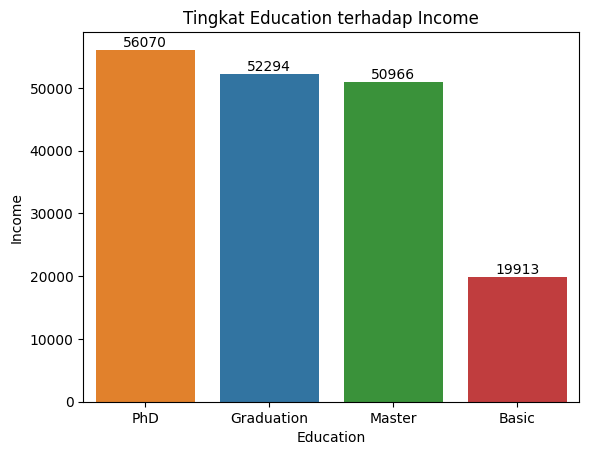

In [65]:
plots = sns.barplot(data=df, x='Education', y='Income', hue='Education', ci=0, order=df.groupby("Education")["Income"].mean().sort_values(ascending=False).index)

plt.title('Tingkat Education terhadap Income')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

dapat  terlihat bahwa nilai rerata graduation lebih besar dari master ini pun dapat dikatakan karena jumlah kustomer dengan latar pendidikan graduation adalah hampir 2x lipat latar pendidikan master yaitu sebesar 1022 vs 540.

## 3.6 Melihat Aktivitas Registrasi Customer dalam kurun 2 tahun perolehan data

Dapat terlihat dari histplot diatas, bahwa aktivitas registriasi customer cukup fluktuatif dari bulan ke bulan selama 2 tahun masa perolehan data. Dengan Puncak jumlah registrasi terbanyak pada tahun 2014 bulan 6.

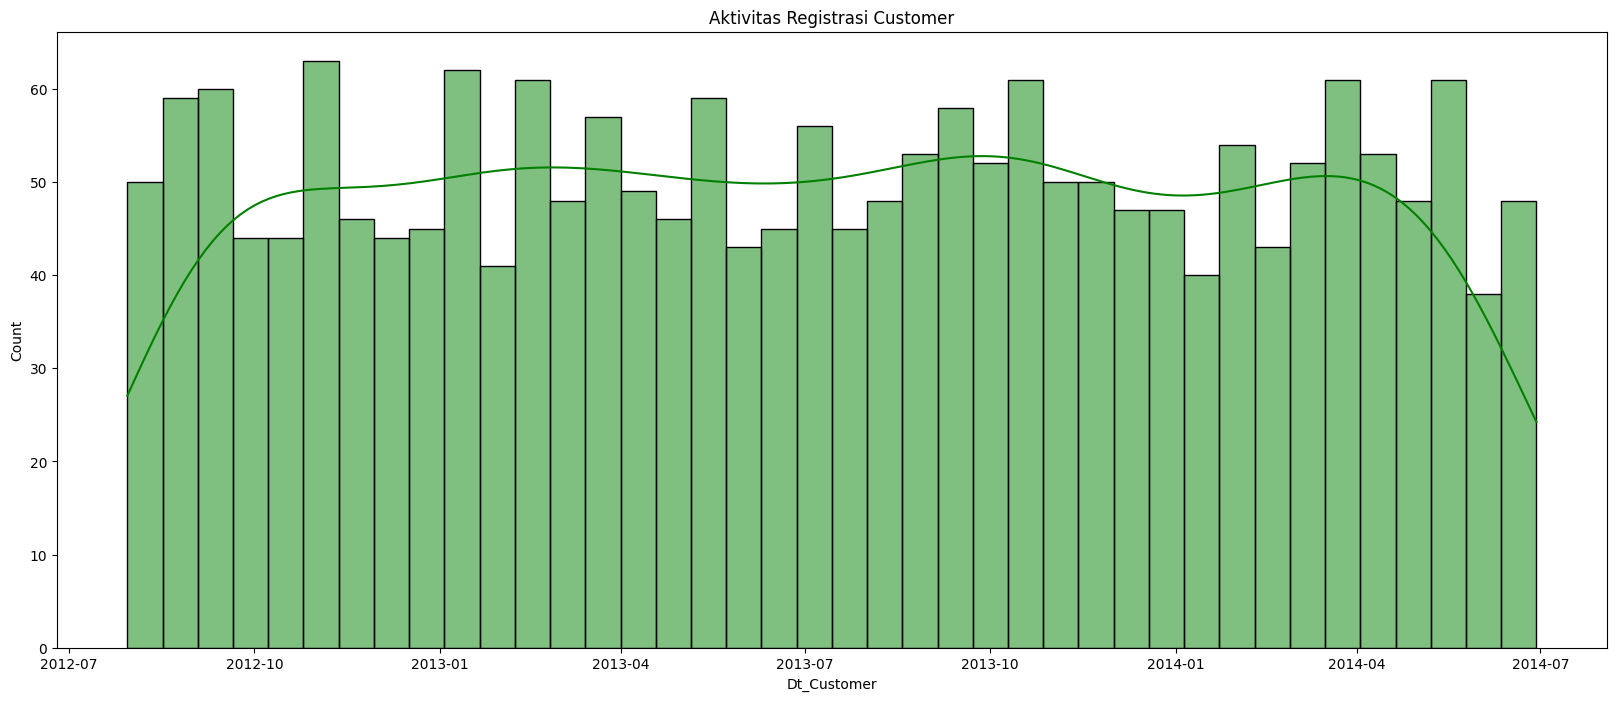

In [66]:
plt.figure(figsize=(20,8))

sns.histplot(data=df, x='Dt_Customer', kde=True, bins=40, color='green')

plt.title('Aktivitas Registrasi Customer')

plt.show()

In [67]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [68]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

## 3.7 Pola Penjualan Produk Deep Dive

Pada sub-bagian ini kita akan melihat products: 
 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' dari segi pola penjualan


### 3.7.1 Pola Pembelian untuk Produk `MntFruits`, `MntFishProducts`, `MntSweetProducts`

Produk - produk yang dijual di supermarket tentunya adalah barang yang fast moving atau sesuatu hal yang lumrah terjadi karena kebutuhan sehari - hari.

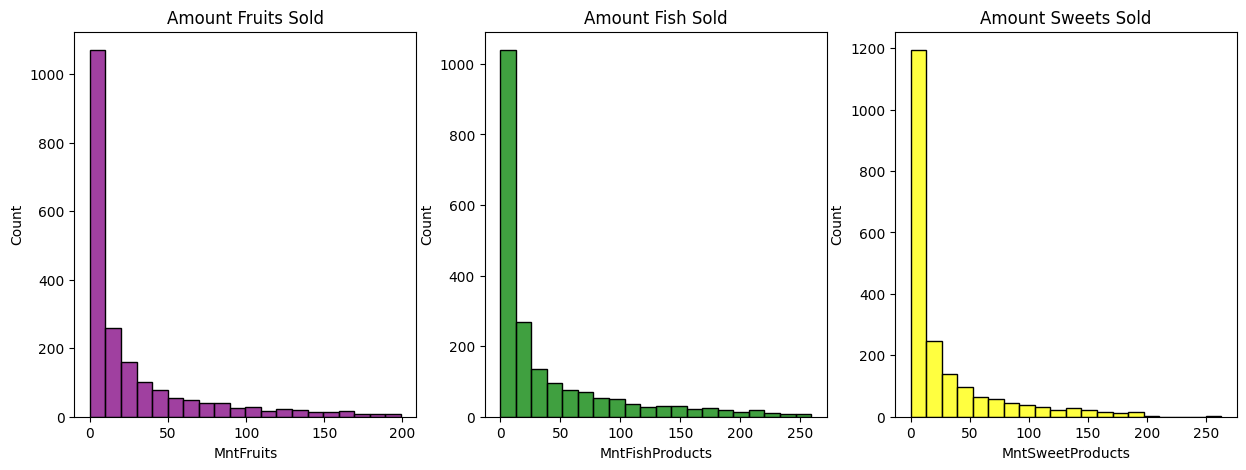

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='MntFruits', color='purple', bins=20)
plt.title('Amount Fruits Sold')


plt.subplot(1,3,2)
sns.histplot(data=df, x='MntFishProducts', color='green', bins=20)
plt.title('Amount Fish Sold')


plt.subplot(1,3,3)
sns.histplot(data=df, x='MntSweetProducts', color='yellow', bins=20)
plt.title('Amount Sweets Sold')


plt.show()

**Insight:** 

- Melalui komparasi tiga produk fruits, fish dan sweets kita dapat melihat adanya pola pembelian yang serupa yaitu, pembelian ketiga produk ini dilakukan paling banyak dengan quantity yang sedikit dalam sebuah transaksi.
- Dapat di simpulkan bahwa produk **`MntFruits`, `MntFishProducts`, `MntSweetProducts` hampir 50% dari total transakaksi nya adalah pembelian dengan quantity dibawah 10 pcs**.
- Penjualan dengan quantity yang tinggi berkisar pada 200 ~ 250 pcs untuk ketiga produk tersebut, dan memiliki frekuensi transaksi lebih rendah secara signifikan tentunya.
- untuk menaikan penjualan barang dengan karakteristik seperti ini adalah, **melakukan Promo untuk discount pembelian minimal product, semisal beli 2 pcs item ke 3 akan discount 50%**. Hal ini akan berdampak secara psikologis kepada calon pembeli untuk membeli lebih banyak karena di untungkan.

In [70]:
print(f'Penjualan Fruits dengan quantity dibawah 10 pcs adalah sebanyak {len(df[df['MntFruits']<10])} transaksi')

print(f'Penjualan Fish dengan quantity dibawah 10 pcs adalah sebanyak {len(df[df['MntFishProducts']<10])} transaksi')

print(f'Penjualan Sweets dengan quantity dibawah 10 pcs adalah sebanyak {len(df[df['MntSweetProducts']<10])} transaksi')

Penjualan Fruits dengan quantity dibawah 10 pcs adalah sebanyak 1070 transaksi
Penjualan Fish dengan quantity dibawah 10 pcs adalah sebanyak 907 transaksi
Penjualan Sweets dengan quantity dibawah 10 pcs adalah sebanyak 1064 transaksi


### 3.7.2 Pola Pembelian untuk Produk `MntWines`, `MntMeatProducts`, `MntGoldProds`

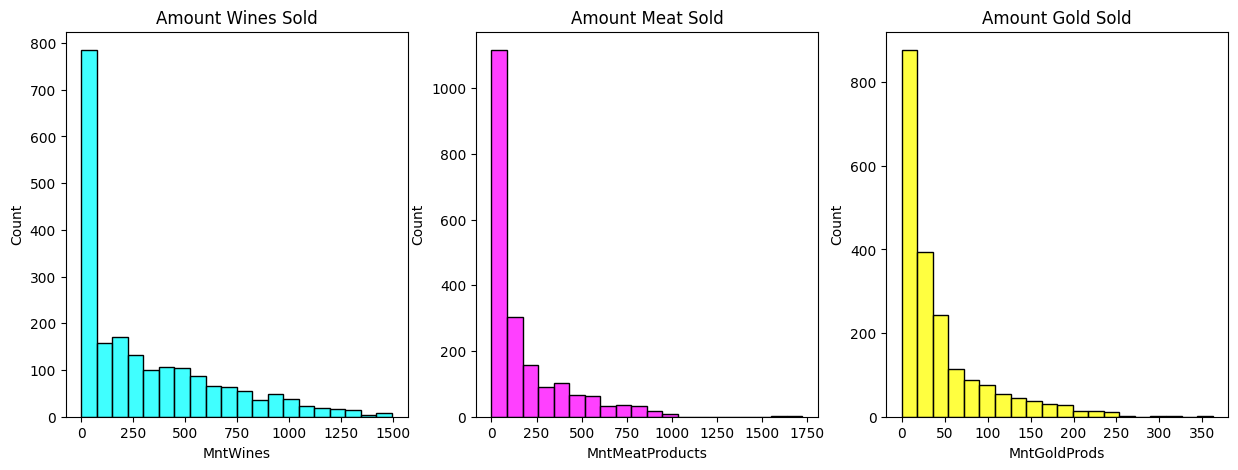

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='MntWines', color='cyan', bins=20)
plt.title('Amount Wines Sold')
#plt.yticks(range(0,450,50))

plt.subplot(1,3,2)
sns.histplot(data=df, x='MntMeatProducts', color='magenta', bins=20)
plt.title('Amount Meat Sold')
#plt.yticks(range(0,450,50))

plt.subplot(1,3,3)
sns.histplot(data=df, x='MntGoldProds', color='yellow', bins=20)
plt.title('Amount Gold Sold')
#plt.yticks(range(0,450,50))

plt.show()

In [72]:
print(f'penjualan {'MntWines'} memiliki total jumlah transaksi {df['MntWines'].sum()} pcs dan max volume transaksi sebesar {df['MntWines'].max()} pcs') 

print(f'penjualan {'MntMeatProducts'} memiliki total jumlah transaksi {df['MntMeatProducts'].sum()} pcs dan max volume transaksi sebesar {df['MntMeatProducts'].max()} pcs') 

print(f'penjualan {'MntGoldProds'} memiliki total jumlah transaksi {df['MntGoldProds'].sum()} pcs dan max volume transaksi sebesar {df['MntGoldProds'].max()} pcs') 

penjualan MntWines memiliki total jumlah transaksi 616626 pcs dan max volume transaksi sebesar 1493 pcs
penjualan MntMeatProducts memiliki total jumlah transaksi 340737 pcs dan max volume transaksi sebesar 1725 pcs
penjualan MntGoldProds memiliki total jumlah transaksi 88507 pcs dan max volume transaksi sebesar 362 pcs


Insight:
- Product Wines & Meat memiliki volume transaksi lebih tinggi di bandingkan produk lainnya, yaitu rekor max volume transaksi  1493.00 pcs dan 1725.00 pcs.
- product gold memiliki ke unikan tersendiri karena, merupakan satu satunya produk yang tidak dapat di konsumsi, namun memiliki potensi penjualan yang cukup  43.58 pcs
- Ketiga product ini yaitu `MntWines`, `MntMeatProducts`, `MntGoldProds`, mendapati klasemen total penjualan terbaik dengan jumlah transaksi sebesar 616.626 pcs, 340.737 pcs dan 88.507 pcs, secara berurutan.
- Dapat disimpulkan bahwa **Wines, dan Meat merupakan produk yang paling banyak dibeli dalam kurun 2 tahun masa perolehan data**. sangat direkomendasikan untuk selalu **memastikan ketersediaan kedua product ini** karena fast moving untuk memenuhi kebutuhan permintaan kustomer. sehingga tidak berpaling ke kompetitor saat stock ternyata tidak available

## 3.8 Kanal Penjualan

Chanel atau kanal penjulan yang beragam terdiri dari 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. disini kita juga dapat melihat perilaku customer yang datang langsung ke store cukup berbeda dengan kustomer yang melakukan pembelian melali katalog.

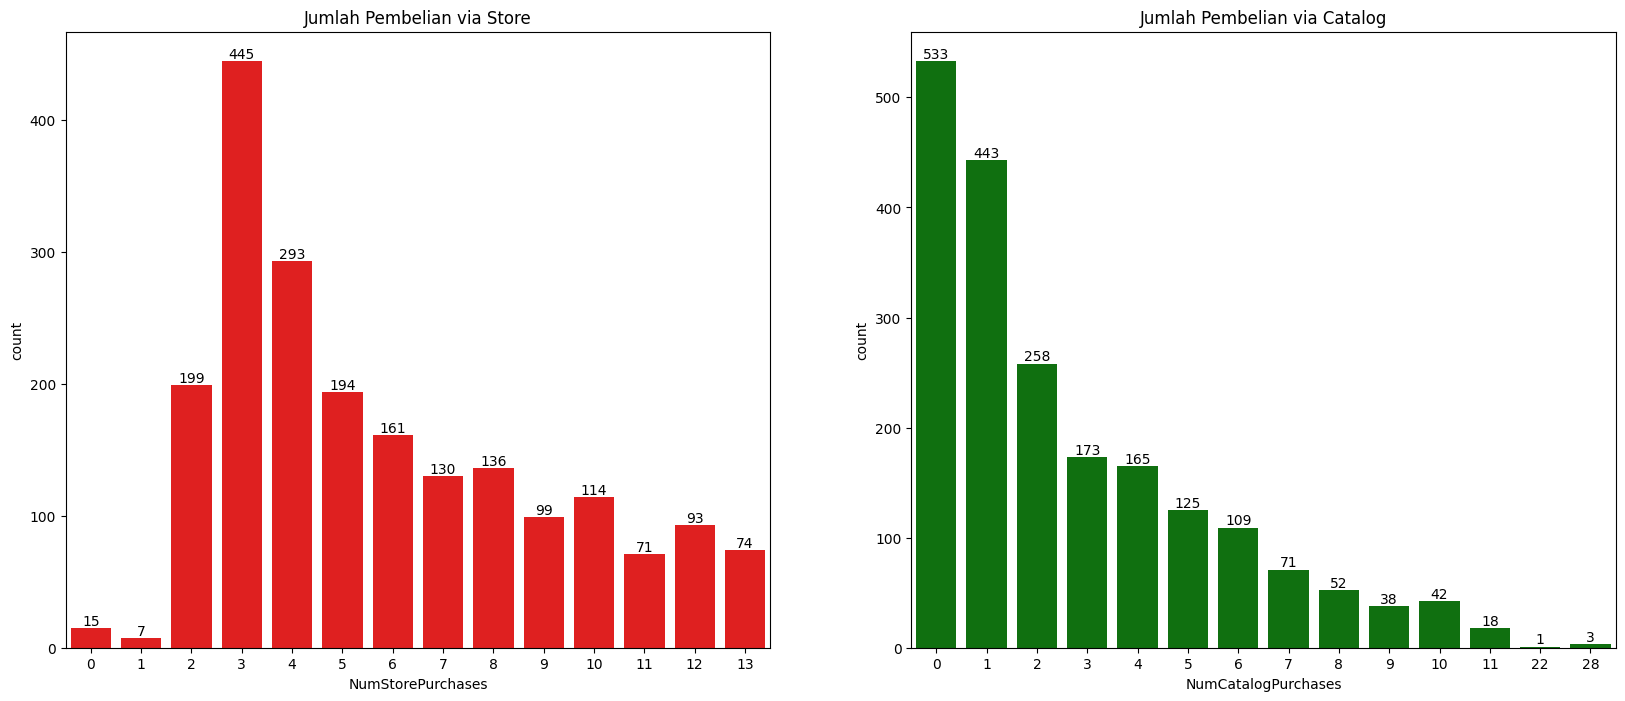

In [73]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Jumlah Pembelian via Store')
plots = sns.countplot(data=df, x='NumStorePurchases', color='red')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.subplot(1,2,2)
plt.title('Jumlah Pembelian via Catalog')
plots = sns.countplot(data=df, x='NumCatalogPurchases', color='green')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.show()

In [74]:
print(f'penjualan {'NumStorePurchases'} memiliki total jumlah transaksi {df['NumStorePurchases'].sum()} pcs ') 

print(f'penjualan {'NumCatalogPurchases'} memiliki total jumlah transaksi {df['NumCatalogPurchases'].sum()} pcs ') 

penjualan NumStorePurchases memiliki total jumlah transaksi 11736 pcs 
penjualan NumCatalogPurchases memiliki total jumlah transaksi 5396 pcs 


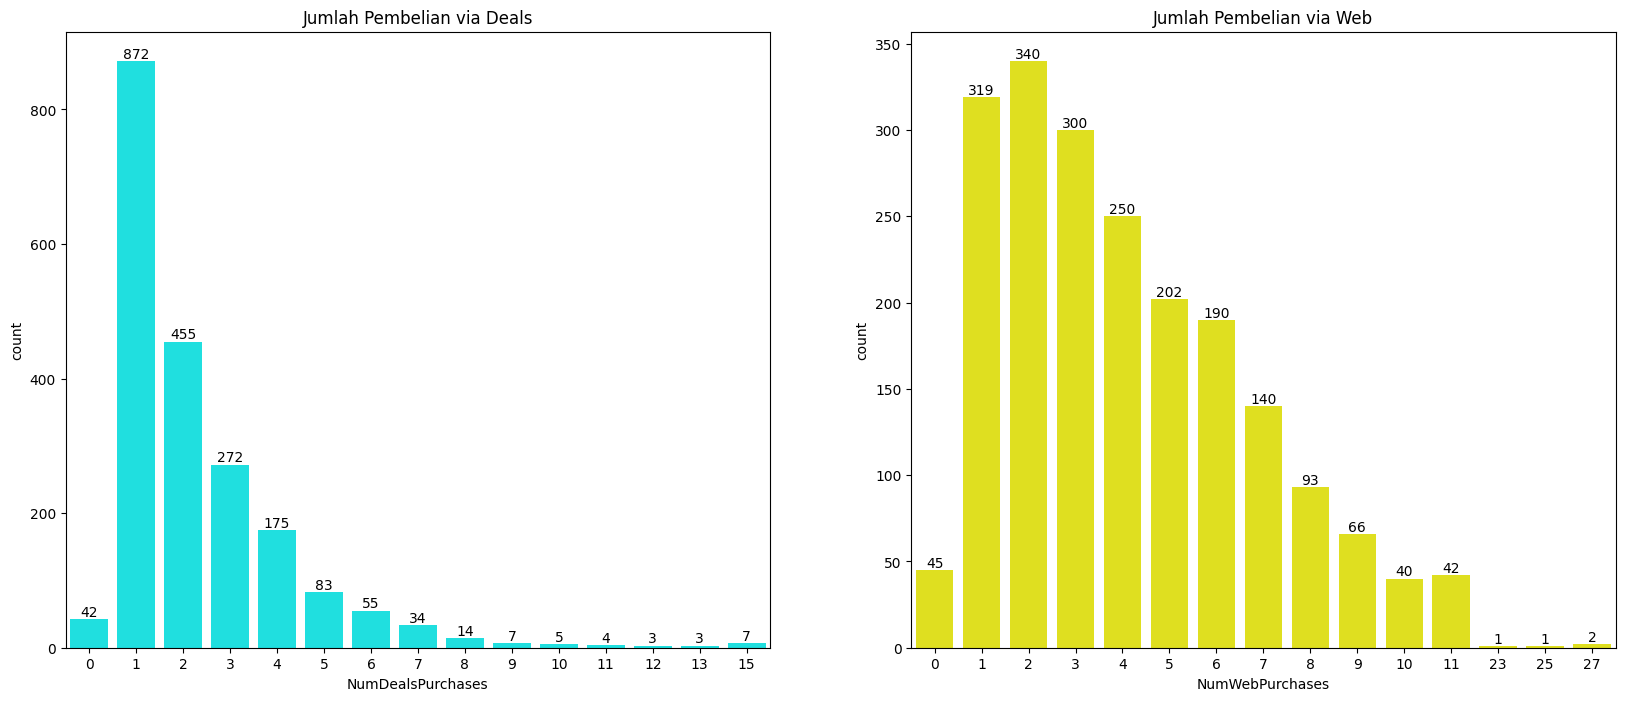

In [75]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
plots = sns.countplot(data=df, x='NumDealsPurchases', color='cyan')
plt.title('Jumlah Pembelian via Deals')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.subplot(1,2,2)
plots = sns.countplot(data=df, x='NumWebPurchases', color='yellow')
plt.title('Jumlah Pembelian via Web')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')



plt.show()

In [76]:
print(f'penjualan {'NumDealsPurchases'} memiliki total jumlah transaksi {df['NumDealsPurchases'].sum()} pcs ') 

print(f'penjualan {'NumWebPurchases'} memiliki total jumlah transaksi {df['NumWebPurchases'].sum()} pcs ') 

penjualan NumDealsPurchases memiliki total jumlah transaksi 4730 pcs 
penjualan NumWebPurchases memiliki total jumlah transaksi 8331 pcs 


**Insight:**
-   Melalui perbandingan grafik diatas terlihat total transaksi dari masing masing kanal penjualan, terlihat direct store purchase adalah yang paling di minati.
- deals purchase atau pembelian melalui promo juga masih rendah, adanya indikasi dari tidak tepat sasaran promosi yang diberikan. 

# 4. RFM
Melalui RFM atau Recency, Frequency dan Monetary kita dapat melihat perilaku kustomer agar dapat ter klasifikasikan serta menetapkan langkah aplikatif serta upaya agar customer retention tetap terjaga.

In [77]:
# setelah cleaning tanpa penambahan kolom
df.shape

(2031, 27)

## 4.1 Membuat kolom Frequency

Pembelian dilakukan melalui beberapa cara yaitu diantaranya:
-   pembelian melalui web
-   pembelian menggunakan promo
-   pembelian melalui katalog
-   pembelian ke store secara langsung

In [78]:
# Frequency: jumlah total frekuensi pembelian
df['Frequency'] = (
    df['NumDealsPurchases'] +
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

In [79]:
df['Frequency'].describe()

count    2031.000000
mean     14.866076  
std      7.665018   
min      0.000000   
25%      8.000000   
50%      15.000000  
75%      21.000000  
max      44.000000  
Name: Frequency, dtype: float64

## 4.2 Menentukan Monetary

-   berkaitan dengan jumlah total pembelian dari seluruh kategori produk

In [80]:
# Monetary: total pembelanjaan seluruh kategori produk
df['Monetary'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

In [81]:
df['Monetary'].describe()

count    2031.000000
mean     605.827671 
std      601.871427 
min      5.000000   
25%      69.000000  
50%      396.000000 
75%      1043.500000
max      2525.000000
Name: Monetary, dtype: float64

## 4.3 Pengelompokan kolom untuk RFM

Untuk melakukan RFM kita akan menyajikan kolom yang relevan bagi RFM itu tersendiri yaitu sebagai berikut:

predikat dapat dilihat dari recency (loyalitas), Monetary (uang), Frequency (number of purchase)

In [82]:
rfm_data = df[['ID', 'Recency', 'Frequency', 'Monetary']]
rfm_data

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422
...,...,...,...,...
2232,8080,50,4,22
2235,10870,46,18,1341
2237,7270,91,19,1241
2238,8235,8,23,843


In [83]:
df.sort_values(by=['Recency','Frequency','Monetary'], ascending=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Frequency,Monetary
66,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,4,11
160,2795,1958,Master,Single,30523.0,2,1,2013-07-01,0,5,...,7,0,0,0,0,0,0,0,4,13
1028,10175,1958,PhD,Divorced,32173.0,0,1,2013-08-01,0,18,...,4,0,0,0,0,0,0,0,5,22
810,2964,1981,Graduation,Married,26872.0,0,0,2013-10-16,0,3,...,6,0,0,0,0,0,0,0,5,72
100,1473,1960,Master,Single,47823.0,0,1,2013-07-23,0,53,...,8,0,0,0,0,0,0,0,7,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,4070,1969,PhD,Married,94871.0,0,2,2012-09-01,99,169,...,7,0,1,1,0,0,0,1,18,1078
685,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,20,689
700,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,...,4,0,0,0,0,0,0,0,20,734
1542,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,20,1383


## 4.4 `RFM_SCORE`

`Recency_score` akan dibagi menjadi 5 dengan hierarki yang paling tinggi adalah 5 dan paling kecil adalah 1, apabila customer memiliki Recency rendah atau jarak dari pembelian terakhir yang cukup recent, ini akan kita labeli lebih baik daripada customer yang memiliki jarak dari pembelian terakhir yang cukup tinggi.

`Frequency_score` merupakan seberapa sering customer melakukan transaksi

`Monetary_score` adalah jumlah dari produk yang dibeli oleh customer

`RFM_SCORE` merupakan upaya segmentasi kita terhadap spending behaviour customer

In [84]:
df["Recency_score"] = pd.qcut(df["Recency"], 5, labels = [5,4,3,2,1])

df["Frequency_score"] = pd.qcut(df["Frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])

df["Monetary_score"] = pd.qcut(df["Monetary"], 5, labels = [1,2,3,4,5])

df["RFM_SCORE"] = (df['Recency_score'].astype(str) + df["Frequency_score"].astype(str) + df["Monetary_score"].astype(str))

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,25,1617,3,5,5,355
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,6,27,4,1,1,411
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,21,776,4,4,4,444
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,8,53,4,2,1,421
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,19,422,1,4,3,143


In [85]:
df['RFM_SCORE'].max()

'555'

## 4.5 Membuat `segmentation` berdasarkan `RFM_SCORE`

Segmentasi akan di lakukan berdasarkan scoring yang telah kita lakukan sebelumnya, yaitu berdasarkan Recency_score, Frequency_score, Monetary_score dan pengelompokan ini akan memberi label agar pengelompokan dapat dilakukan sehingga dapat terlihat sebaran segmen yang ada pada customer.

In [86]:
def segment_customer(row):
    Recency_score, Frequency_score, Monetary_score = row['Recency_score'], row['Frequency_score'], row['Monetary_score']
    
    if Recency_score == 5 and Frequency_score == 5 and Monetary_score == 5:
        return '1st_Prioritas' # 1st Best customers (recent, frequent, high spend)
    
    elif Recency_score >= 4 and Frequency_score >= 4 and Monetary_score >= 4:
        return '2nd_Loyal' # 2nd best customer (recent, frequent, high spend)

    elif Recency_score >= 3 and Frequency_score >= 3 and Monetary_score >= 3:
        return '3rd_Potensial_Loyal'  # Customers who are loyal (moderate Recency_score, Frequency_score, and spend)
    
    elif Recency_score <= 2 and Frequency_score >= 3 and Monetary_score >= 3:
        return '4th_Up_Recency'  # Low Recency_score but high Frequency_score and Monetary_score (likely loyal)

    elif Recency_score >= 4 and Frequency_score <= 2 and Monetary_score <= 2:
        return '5th_new_shopper'  # tergolong terhadap customer baru
              
    elif Recency_score <= 3 and Frequency_score >= 2 and Monetary_score >= 2:
        return '6th_At_Risk'  # Customers who are at risk of leaving (low Recency_score, medium Frequency_score and spend)
    
    elif Recency_score <= 2 and Frequency_score <= 2 and Monetary_score <= 2:
        return '7th_Hibernating'  # Least engaged customers (infrequent, low spend, long since last purchase)

    elif Recency_score >= 1 and Frequency_score <= 3 and Monetary_score <= 3:
        return '8th_Musiman'
    
    else:
        return '9th_Need_Attention'  # customer yang tidak termasuk dengan kategori yang telah di tetapkan

# apply segmentasi terhadap tiap row pada dataframde df
df["segment"] = df.apply(segment_customer, axis=1)

df['segment'].value_counts()


segment
4th_Up_Recency         479
3rd_Potensial_Loyal    450
5th_new_shopper        319
2nd_Loyal              236
6th_At_Risk            209
7th_Hibernating        184
8th_Musiman            129
1st_Prioritas          22 
9th_Need_Attention     3  
Name: count, dtype: int64

In [87]:
df[df['segment']=='1st_Prioritas']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,segment
51,4114,1964,Master,Married,79143.0,0,0,2012-08-11,2,650,...,0,0,0,29,1693,5,5,5,555,1st_Prioritas
67,9369,1979,Master,Single,88194.0,0,1,2014-03-19,19,688,...,0,0,1,32,1274,5,5,5,555,1st_Prioritas
188,6982,1976,Graduation,Married,74068.0,0,0,2013-03-19,14,783,...,0,0,0,24,1581,5,5,5,555,1st_Prioritas
209,380,1954,Graduation,Divorced,64497.0,0,1,2012-09-10,17,1170,...,0,0,1,29,1804,5,5,5,555,1st_Prioritas
412,7030,1955,PhD,Married,66465.0,0,1,2013-03-30,1,1200,...,0,0,0,35,1485,5,5,5,555,1st_Prioritas
749,4073,1954,Master,Married,63564.0,0,0,2014-01-29,0,769,...,0,0,1,28,1215,5,5,5,555,1st_Prioritas
767,1911,1987,Graduation,Together,67430.0,0,0,2012-09-05,6,595,...,0,0,0,29,1364,5,5,5,555,1st_Prioritas
878,1446,1956,Master,Single,86424.0,0,0,2014-04-05,12,387,...,0,0,0,28,1226,5,5,5,555,1st_Prioritas
984,5718,1950,Graduation,Married,80763.0,0,0,2013-08-15,17,674,...,0,0,1,23,1415,5,5,5,555,1st_Prioritas
1060,4491,1949,Master,Married,62845.0,1,1,2012-10-01,3,1099,...,0,0,0,28,1178,5,5,5,555,1st_Prioritas


Dapat terlihat pada segment `9th_Need_Attention`, terdapat 3 jumlah customer yang memiliki cukup tinggi recency, tinggi monetary namun rendah dari segi frequency, dapat terlihat dari RFM Score nya yaitu, 525, 424, dan 315. memiliki nilai score frequency <=2. setelah kita investigasi dari `Monetary` ini cukup besar jumlahnya. dapat dikatakan ketiga tipe kustomer ini merupakan sering melakukan pembelian dalam jumlah yang besar namun dengan frequency yang rendah. biasanya dapat dikategorikan sebagai Reseller atau grosir pengecer.
<br>
<br>

In [88]:
df[df['segment']=='9th_Need_Attention']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,segment
1158,7959,1961,Graduation,Married,79410.0,0,0,2014-05-29,19,658,...,0,0,0,11,1370,5,2,5,525,9th_Need_Attention
1243,7718,1947,Master,Together,66000.0,0,0,2014-04-20,36,244,...,0,0,0,10,711,4,2,4,424,9th_Need_Attention
2228,8720,1978,Master,Together,52203.0,0,0,2012-08-12,53,32,...,0,0,0,1,1679,3,1,5,315,9th_Need_Attention


In [89]:
df['segment'].unique()

array(['3rd_Potensial_Loyal', '5th_new_shopper', '2nd_Loyal',
       '4th_Up_Recency', '7th_Hibernating', '8th_Musiman', '6th_At_Risk',
       '1st_Prioritas', '9th_Need_Attention'], dtype=object)

In [90]:
cek = df[['ID', 'Recency', 'Frequency', 'Monetary','RFM_SCORE', 'segment']]
cek.sort_values(by='RFM_SCORE', ascending=False)

,ID,Recency,Frequency,Monetary,RFM_SCORE,segment
1060,4491,3,28,1178,555,1st_Prioritas
209,380,17,29,1804,555,1st_Prioritas
1953,7919,2,23,2092,555,1st_Prioritas
1653,4931,13,28,1730,555,1st_Prioritas
188,6982,14,24,1581,555,1st_Prioritas
...,...,...,...,...,...,...
589,4179,94,6,55,111,7th_Hibernating
834,10402,94,6,39,111,7th_Hibernating
1804,8397,82,6,34,111,7th_Hibernating
1302,1878,83,6,37,111,7th_Hibernating


In [121]:
# mengurutkan kondisi untuk visualisasi total user by segment
df['segment'].value_counts()

segment
4th_Up_Recency         479
3rd_Potensial_Loyal    450
5th_new_shopper        319
2nd_Loyal              236
6th_At_Risk            209
7th_Hibernating        184
8th_Musiman            129
1st_Prioritas          22 
9th_Need_Attention     3  
Name: count, dtype: int64

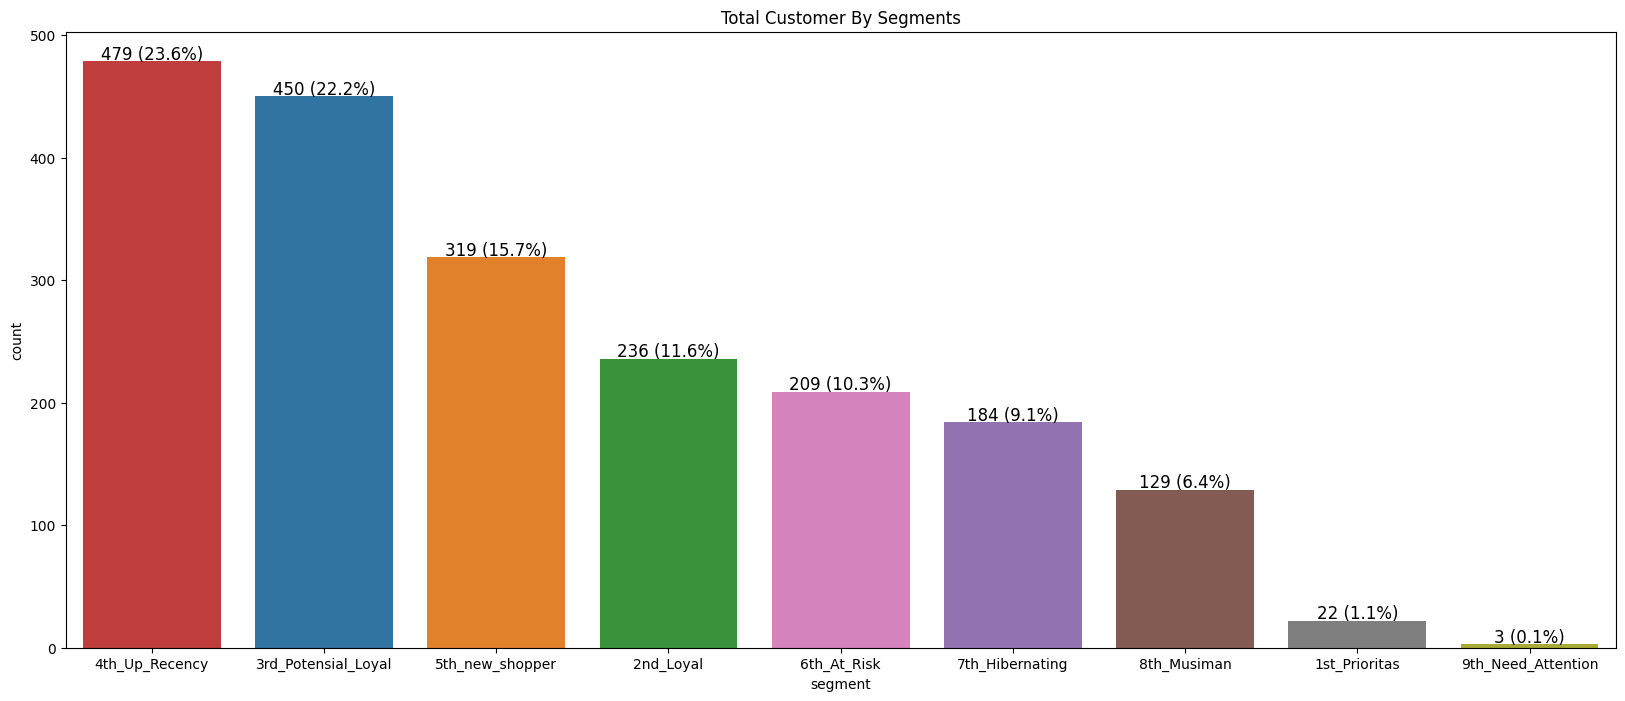

In [120]:
plt.figure(figsize=(20,8))

plots = sns.countplot(data=df, x='segment', hue='segment', order=df['segment'].value_counts().index)

total_count = len(df)

plt.title('Total Customer By Segments')

for bar in plots.patches:
    count = bar.get_height()
    percentage = (count / total_count) * 100
    plots.annotate(f'{count:.0f} ({percentage:.1f}%)',              
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

In [92]:
# kondisi untuk sort pada visualisasi dibawah
df.groupby("segment")["Monetary"].mean().sort_values(ascending=False)

segment
1st_Prioritas          1547.136364
9th_Need_Attention     1253.333333
2nd_Loyal              1199.457627
4th_Up_Recency         993.475992 
3rd_Potensial_Loyal    817.553333 
6th_At_Risk            138.583732 
8th_Musiman            68.790698  
5th_new_shopper        63.683386  
7th_Hibernating        41.521739  
Name: Monetary, dtype: float64

In [93]:
df.groupby("segment")["Monetary"].mean().sum()

np.float64(6123.53620351315)

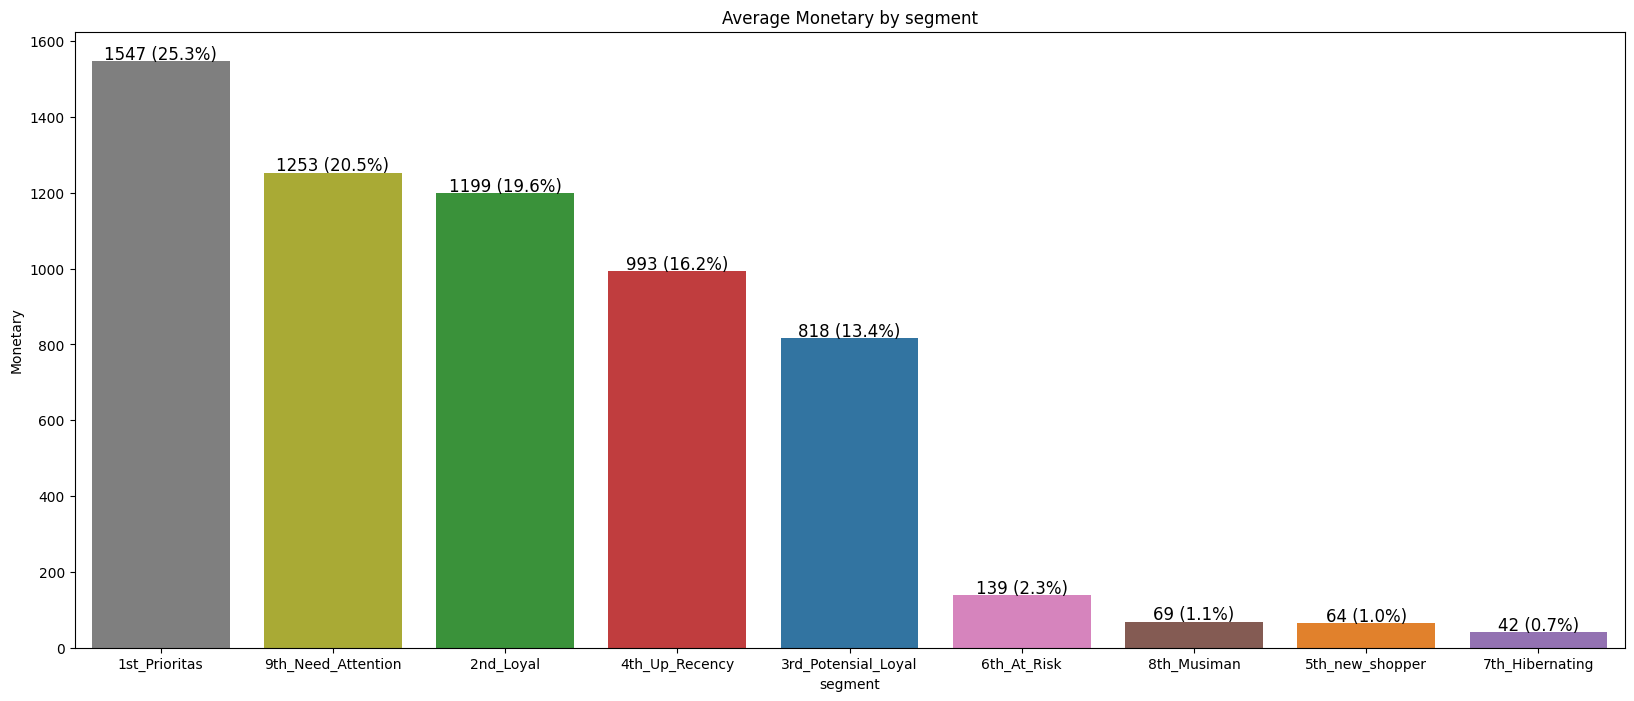

In [94]:
plt.figure(figsize=(20,8))

plots = sns.barplot(data=df, x='segment',y='Monetary', ci=0, hue='segment', order=df.groupby("segment")["Monetary"].mean().sort_values(ascending=False).index)

total_count = df.groupby("segment")["Monetary"].mean().sum()

plt.title('Average Monetary by segment')

for bar in plots.patches:
    count = bar.get_height()
    percentage = (count / total_count) * 100
    plots.annotate(f'{count:.0f} ({percentage:.1f}%)',              
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

In [ ]:
# Digunakan untuk membuat file excel baru berisikan action.
# df['action'] = np.where(df['segment']=='1st_Prioritas', 'Loyalty Program Enhancement: Offer them exclusive rewards or VIP treatment, such as early access to new products, personal account managers, or loyalty points that can be redeemed for premium benefits. and Thank You/Anniversary Gifts: Send personalized "thank you" notes or small gifts, showing appreciation for their loyalty', 
#                 np.where(df['segment']=='2nd_Loyal', 'Upselling/Cross-selling: Use their history to recommend complementary products. For example, if they often buy one type of product, suggest accessories or related items.',
#                 np.where(df['segment']=='3rd_Potensial_Loyal', 'Product Bundles: Introduce product bundles or discounts for purchasing multiple items, making it easier for them to buy more',
#                 np.where(df['segment']=='4th_Up_Recency', 'Customer Survey: Send a survey to understand why they have not purchased recently. This could help you identify issues that might be hindering their engagement',
#                 np.where(df['segment']=='5th_new_shopper', 'First Purchase Discount: Offer a special discount or bundle on their first repeat purchase to incentivize them to come back and Product Education: Provide tutorials or guides about how to get the best out of their purchase, making them feel more comfortable with your products. and Abandoned Cart Reminders: If they add items to the cart but don not purchase, send friendly reminders with a discount or incentive to complete the purchase.',
#                 np.where(df['segment']=='6th_At_Risk', 'Urgency Messaging: Use urgency-based messaging like "Only 3 left in stock!" or “Your favorite items are on sale - don’t miss out!” to encourage immediate purchases , and Re-engagement Offers: Send an exclusive offer (e.g., "Come back and get 20% off your next purchase!")',
#                 np.where(df['segment']=='7th_Hibernating', 'Win-Back Campaign: Offer them an irresistible deal, like a huge discount or a special gift with their next purchase to re-engage them',
#                 np.where(df['segment']=='8th_Musiman', 'Seasonal Promotions: Provide discounts or bundle deals for their favorite season or occasion, to remind them of your products',
#                 np.where(df['segment']=='9th_Need_Attention', 'Personalized Messaging: Try to find out what might appeal to them—whether it’s a product that meets a specific need or a value proposition that better suits their preferences',                
#                 'others')))))))))

In [96]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,25,1617,3,5,5,355,3rd_Potensial_Loyal
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,6,27,4,1,1,411,5th_new_shopper
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,21,776,4,4,4,444,2nd_Loyal
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,8,53,4,2,1,421,5th_new_shopper
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,19,422,1,4,3,143,4th_Up_Recency


In [97]:
df[df['segment']=='3rd_Potensial_Loyal'].head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,25,1617,3,5,5,355,3rd_Potensial_Loyal


## 4.6 Segment & Actionable Campaign Recommendation

Dalam menentukan actionable campaign kita dapat mengacu terhadap sebaran user dan karakteristik spending nya bisa melalui visualisasi dibawah ini

In [122]:
# mengurutkan kondisi untuk visualisasi total user by segment
df['segment'].value_counts()

segment
4th_Up_Recency         479
3rd_Potensial_Loyal    450
5th_new_shopper        319
2nd_Loyal              236
6th_At_Risk            209
7th_Hibernating        184
8th_Musiman            129
1st_Prioritas          22 
9th_Need_Attention     3  
Name: count, dtype: int64

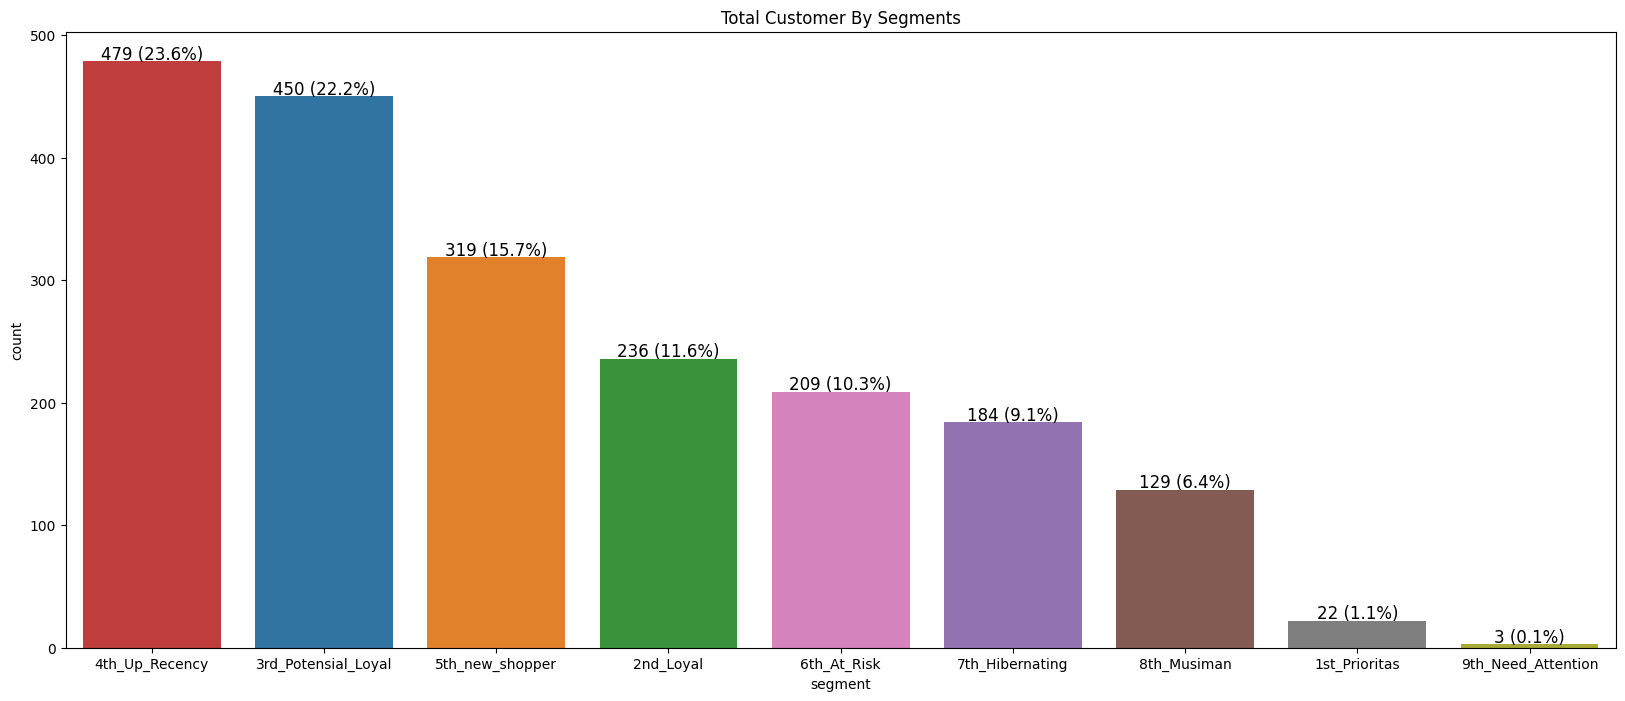

In [ ]:
plt.figure(figsize=(20,8))

plots = sns.countplot(data=df, x='segment', hue='segment', order=df['segment'].value_counts().index)

total_count = len(df)

plt.title('Total Customer By Segments')

for bar in plots.patches:
    count = bar.get_height()
    percentage = (count / total_count) * 100
    plots.annotate(f'{count:.0f} ({percentage:.1f}%)',              
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

Membuat grafik rata rata monetary spend by segment

In [ ]:
# kondisi untuk sort pada visualisasi dibawah
df.groupby("segment")["Monetary"].mean().sort_values(ascending=False)

segment
1st_Prioritas          1547.136364
9th_Need_Attention     1253.333333
2nd_Loyal              1199.457627
4th_Up_Recency         993.475992 
3rd_Potensial_Loyal    817.553333 
6th_At_Risk            138.583732 
8th_Musiman            68.790698  
5th_new_shopper        63.683386  
7th_Hibernating        41.521739  
Name: Monetary, dtype: float64

In [ ]:
df.groupby("segment")["Monetary"].mean().sum()

np.float64(6123.53620351315)

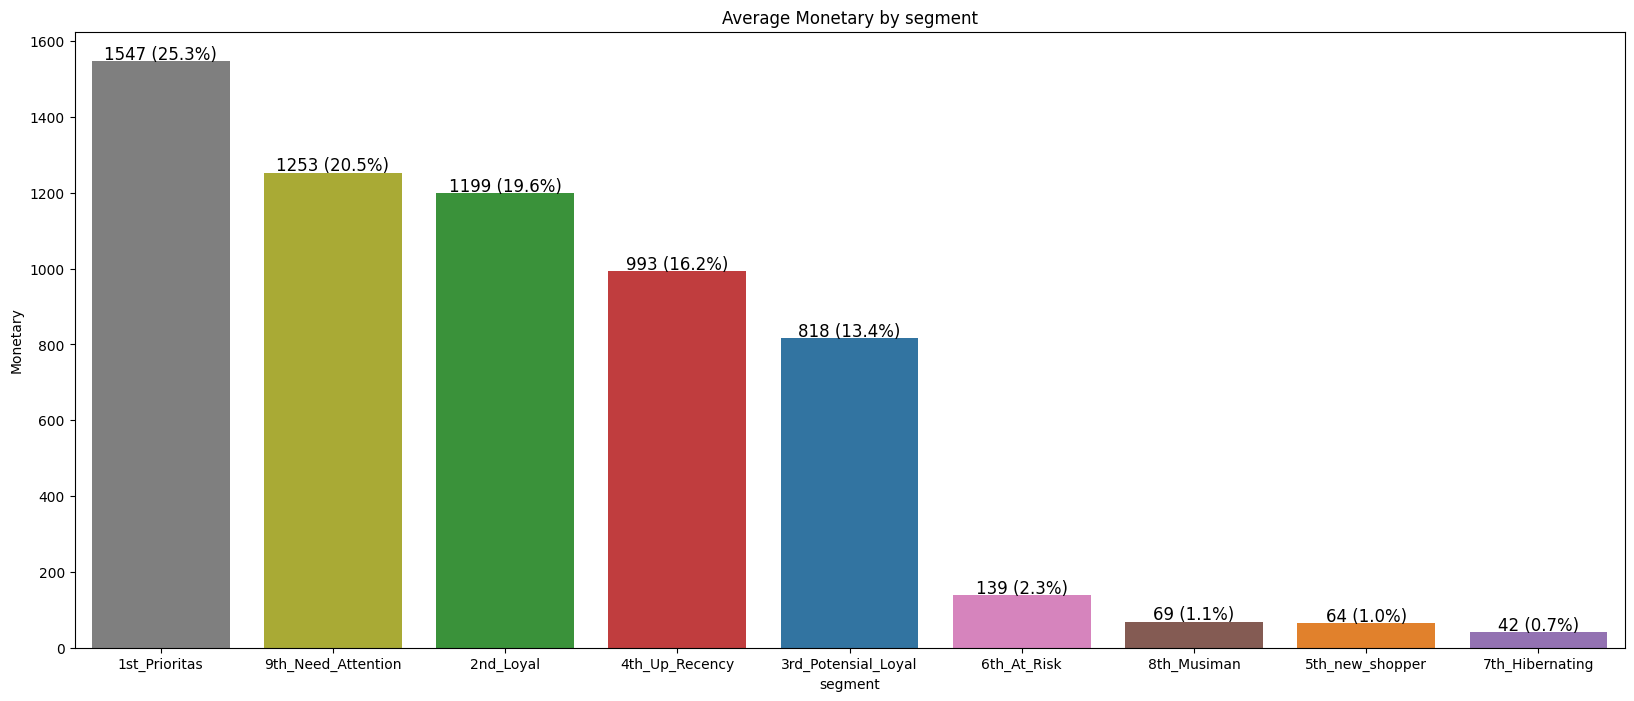

In [ ]:
plt.figure(figsize=(20,8))

plots = sns.barplot(data=df, x='segment',y='Monetary', ci=0, hue='segment', order=df.groupby("segment")["Monetary"].mean().sort_values(ascending=False).index)

total_count = df.groupby("segment")["Monetary"].mean().sum()

plt.title('Average Monetary by segment')

for bar in plots.patches:
    count = bar.get_height()
    percentage = (count / total_count) * 100
    plots.annotate(f'{count:.0f} ({percentage:.1f}%)',              
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

Actionable action ini dapat dibuat kedalam kolom baru

In [ ]:
# Digunakan untuk membuat file excel baru berisikan action.
# df['action'] = np.where(df['segment']=='1st_Prioritas', 'Loyalty Program Enhancement: Offer them exclusive rewards or VIP treatment, such as early access to new products, personal account managers, or loyalty points that can be redeemed for premium benefits. and Thank You/Anniversary Gifts: Send personalized "thank you" notes or small gifts, showing appreciation for their loyalty', 
#                 np.where(df['segment']=='2nd_Loyal', 'Upselling/Cross-selling: Use their history to recommend complementary products. For example, if they often buy one type of product, suggest accessories or related items.',
#                 np.where(df['segment']=='3rd_Potensial_Loyal', 'Product Bundles: Introduce product bundles or discounts for purchasing multiple items, making it easier for them to buy more',
#                 np.where(df['segment']=='4th_Up_Recency', 'Customer Survey: Send a survey to understand why they have not purchased recently. This could help you identify issues that might be hindering their engagement',
#                 np.where(df['segment']=='5th_new_shopper', 'First Purchase Discount: Offer a special discount or bundle on their first repeat purchase to incentivize them to come back and Product Education: Provide tutorials or guides about how to get the best out of their purchase, making them feel more comfortable with your products. and Abandoned Cart Reminders: If they add items to the cart but don not purchase, send friendly reminders with a discount or incentive to complete the purchase.',
#                 np.where(df['segment']=='6th_At_Risk', 'Urgency Messaging: Use urgency-based messaging like "Only 3 left in stock!" or “Your favorite items are on sale - don’t miss out!” to encourage immediate purchases , and Re-engagement Offers: Send an exclusive offer (e.g., "Come back and get 20% off your next purchase!")',
#                 np.where(df['segment']=='7th_Hibernating', 'Win-Back Campaign: Offer them an irresistible deal, like a huge discount or a special gift with their next purchase to re-engage them',
#                 np.where(df['segment']=='8th_Musiman', 'Seasonal Promotions: Provide discounts or bundle deals for their favorite season or occasion, to remind them of your products',
#                 np.where(df['segment']=='9th_Need_Attention', 'Personalized Messaging: Try to find out what might appeal to them—whether it’s a product that meets a specific need or a value proposition that better suits their preferences',                
#                 'others')))))))))

| # | Segment | Description | Action Campaign Recommendation
| --- | --- | --- | --- |
| 1 | 1st_Prioritas | high Recency, high frequency, high monetary  | Loyalty Program Enhancement: Offer them exclusive rewards or VIP treatment, such as early access to new products, personal account managers, or loyalty points that can be redeemed for premium benefits. <br> Thank You/Anniversary Gifts: Send personalized "thank you" notes or small gifts, showing appreciation for their loyalty
| 2 | 2nd_Loyal | Recent, Frequent, High Spend | Upselling/Cross-selling: Use their history to recommend complementary products. For example, if they often buy one type of product, suggest accessories or related items.
| 3 | 3rd_Potensial_Loyal | Moderate Recency, Frequency, and Spend | Product Bundles: Introduce product bundles or discounts for purchasing multiple items, making it easier for them to buy more
| 4 | 4th_Up_Recency | Low Recency, High Frequency, High Spend | Customer Survey: Send a survey to understand why they haven't purchased recently. This could help you identify issues that might be hindering their engagement.
| 5 | 5th_new_shopper | Recent, Low Frequency, Low Spend | First Purchase Discount: Offer a special discount or bundle on their first repeat purchase to incentivize them to come back <br> Product Education: Provide tutorials or guides about how to get the best out of their purchase, making them feel more comfortable with your products. <br> Abandoned Cart Reminders: If they add items to the cart but don't purchase, send friendly reminders with a discount or incentive to complete the purchase.
| 6 | 6th_At_Risk | Low Recency, Medium Frequency and Spend | Urgency Messaging: Use urgency-based messaging like "Only 3 left in stock!" or “Your favorite items are on sale - don’t miss out!” to encourage immediate purchases , <br> Re-engagement Offers: Send an exclusive offer (e.g., "Come back and get 20% off your next purchase!")
| 7 | 7th_Hibernating | Low Recency, Low Frequency, Low Spend | Win-Back Campaign: Offer them an irresistible deal, like a huge discount or a special gift with their next purchase to re-engage them.
| 8 | 8th_Musiman | Seasonal Shoppers - Low Frequency, Low Spend, Some Recency | Seasonal Promotions: Provide discounts or bundle deals for their favorite season or occasion, to remind them of your products.
| 9 | 9th_Need_Attention | special case | Personalized Messaging: Try to find out what might appeal to them—whether it’s a product that meets a specific need or a value proposition that better suits their preferences

# 5. Export Clean data ke Tableau


setelah melakukan data cleaning kita melakukan export to file berupa excel dengan extension xlsx dengan nama `Supermarket_RFM_mark_3.xlsx` untuk selanjutnya dapat dilakukan visualiasi lebih lanjut menggunakan tableau dan digabungkan dengan `Supermarket_RFM_mark_3_Action.xlsx`. utamanya kita akan pisahkan disini untuk memudahkan identifikasi seluruh kolom dari data hasil cleansing tanpa adanya kolom action yang isinya berupa text yang cukup panjang

In [ ]:
#database utama
#df.to_excel('Supermarket_RFM_mark_3.xlsx')

In [ ]:
#database dengan action
#df.to_excel('Supermarket_RFM_mark_3_Action.xlsx')

# 6. Pembahasan Analisis 

Permasalahan *warehouse management inventory system* yang dialami oleh **pihak pertama** dapat disebabkan dari penjualan fish produk yang rendah dalam hal ini fish produk atau MntFishProduct membutuhkan cold storage dan biaya operasional berupa listrik yang juga cukup besar, serta mengingat *lead time* atau waktu tunggu yang cukup lama menyebabkan produk ini harus tersedia dan di beli dalam bulk atau jumlah besar oleh **pihak pertama** dari pihak distributor.

ditemukan bahwa top product by sales adalah Wines, dan Meat atau daging. keduanya secara signifikan memiliki sales unggul dibandingkan product lainnya seperti tabel dibawah

| Rank | SKU | Product Description | Sales by Quantity
| --- | --- | --- | --- |
| 1 | MntWinesProduct | Liquor, alcohol based beverages can be stored in room temperature| 616.626
| 2 | MntMeatProduct | Edible flesh of animals 'cattle' need cold storage  |340.737
| 3 | MntGoldProds | Invest instrument in a form of gold bar, jewelry | 88.507
| 4 | MntFish | Edible flesh of fish need cold storage  | 75.827
| 5 | MntFruits | plant based food | 55.350
| 6 | MntSweetproduct | candy, cake or similar can be stored in room temperature | 53.389


## Rekomendasi

Rekomendasi untuk **warehouse management system inventory**

-   perubahan alokasi stok setelah fish produk dalam rentang inventory yang aman menurut lead time nya semisal 2 atau 3 hari dari safety inventory hariannya.
-   opsi penghematan dapat dilakukan untuk proporsi penyediaan wine yang lebih banyak mengingat wine tidak memerlukan cold storage, jadi dapat menghemat biaya operasional listrik.
-   opsi penghematan dapat juga dilakukan untuk proporsi penyediaan produk hewani yaitu meat atau daging, menurut data daging memiliki fluiditas penjualannya cukup baik yaitu rank 2 dan volume nya **kurang lebih 5x lipat dari penjualan fish**. karena tentunya di budidayakan di darat lead time serta penyediaan safety invetory stock produk hewani daging akan lebih pendek sehingga dapat memangkas biaya operasional pengiriman dan 



 
Rekomendasi Berdasarkan **RFM**
- RFM dapat membantu analisis serta pendekatan untuk melakukan actionable action recommendation berdasarkan segmentasi yang kita tentukan sebelumnya mengacu kepada data recency, frequency dan monetary

| # | Segment | Description | Action Campaign Recommendation
| --- | --- | --- | --- |
| 1 | 1st_Prioritas | High Recency, high frequency, high monetary  | Loyalty Program Enhancement: Offer them exclusive rewards or VIP treatment, such as early access to new products, personal account managers, or loyalty points that can be redeemed for premium benefits. <br> Thank You/Anniversary Gifts: Send personalized "thank you" notes or small gifts, showing appreciation for their loyalty
| 2 | 2nd_Loyal | Recent, Frequent, High Spend | Upselling/Cross-selling: Use their history to recommend complementary products. For example, if they often buy one type of product, suggest accessories or related items.
| 3 | 3rd_Potensial_Loyal | Moderate Recency, Frequency, and Spend | Product Bundles: Introduce product bundles or discounts for purchasing multiple items, making it easier for them to buy more
| 4 | 4th_Up_Recency | Low Recency, High Frequency, High Spend | Customer Survey: Send a survey to understand why they haven't purchased recently. This could help you identify issues that might be hindering their engagement.
| 5 | 5th_new_shopper | Recent, Low Frequency, Low Spend | First Purchase Discount: Offer a special discount or bundle on their first repeat purchase to incentivize them to come back <br> Product Education: Provide tutorials or guides about how to get the best out of their purchase, making them feel more comfortable with your products. <br> Abandoned Cart Reminders: If they add items to the cart but don't purchase, send friendly reminders with a discount or incentive to complete the purchase.
| 6 | 6th_At_Risk | Low Recency, Medium Frequency and Spend | Urgency Messaging: Use urgency-based messaging like "Only 3 left in stock!" or “Your favorite items are on sale - don’t miss out!” to encourage immediate purchases , <br> Re-engagement Offers: Send an exclusive offer (e.g., "Come back and get 20% off your next purchase!")
| 7 | 7th_Hibernating | Low Recency, Low Frequency, Low Spend | Win-Back Campaign: Offer them an irresistible deal, like a huge discount or a special gift with their next purchase to re-engage them.
| 8 | 8th_Musiman | Seasonal Shoppers - Low Frequency, Low Spend, Some Recency | Seasonal Promotions: Provide discounts or bundle deals for their favorite season or occasion, to remind them of your products.
| 9 | 9th_Need_Attention | special case | Personalized Messaging: Try to find out what might appeal to them—whether it’s a product that meets a specific need or a value proposition that better suits their preferences

![avgmonetary by segmen.png](<attachment:avgmonetary by segmen.png>)
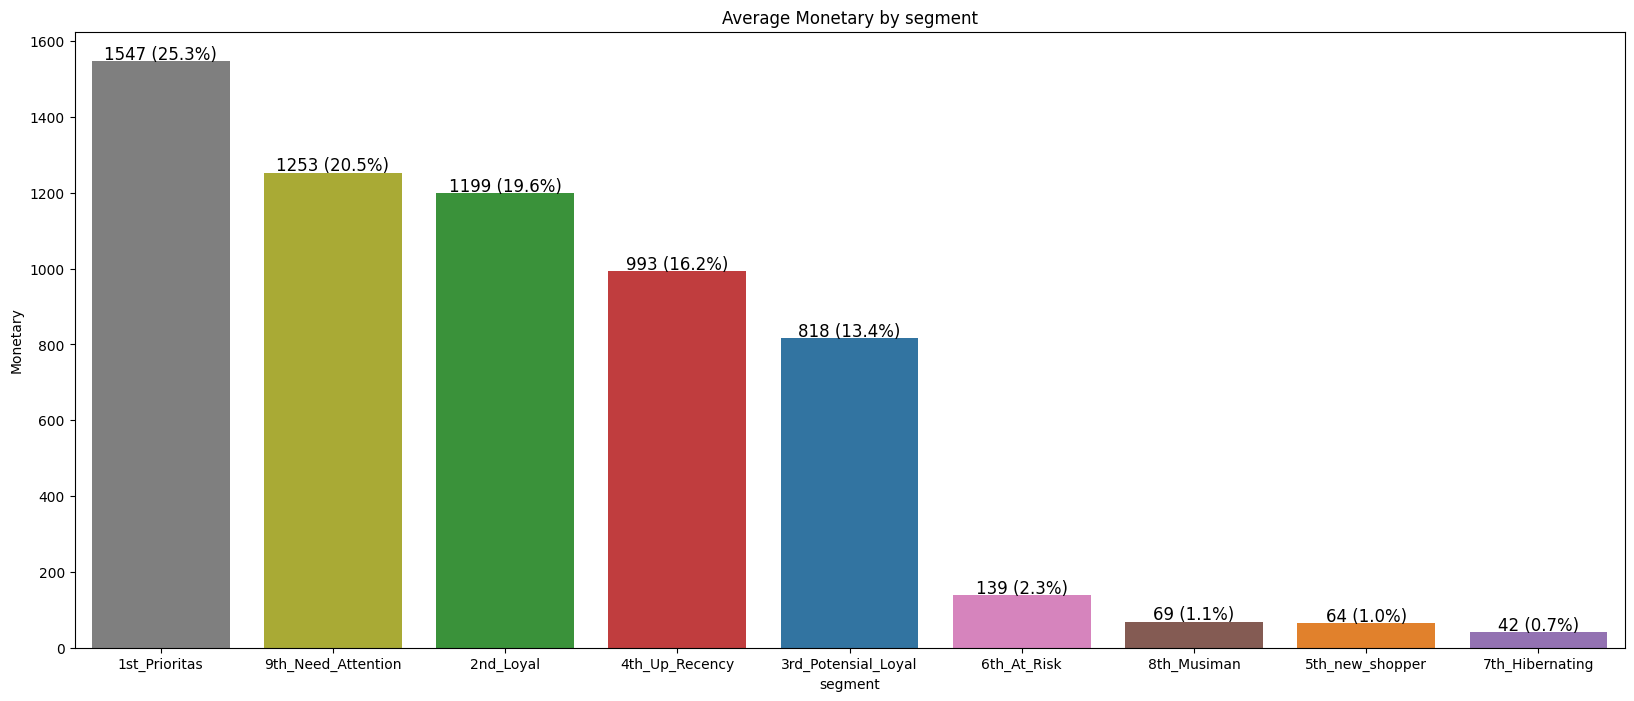

Dari grafik average monetary by segment kita dapat menyimpulkan bahwa 1st_prioritas memiliki avearage monetary tertinggi sebesar 1547 dari sebanyak 22 total kustomer atau 25.3 % bila dibandingkan dengan total data average monetary, popilasi kustomer 1st_prioritas ini hanya sedikit yaitu 1,1% dari total kustomer keseluruhan dan sangat mendominasi dari spending habit nya

![total customer by each segment.png](<attachment:total customer by each segment.png>)
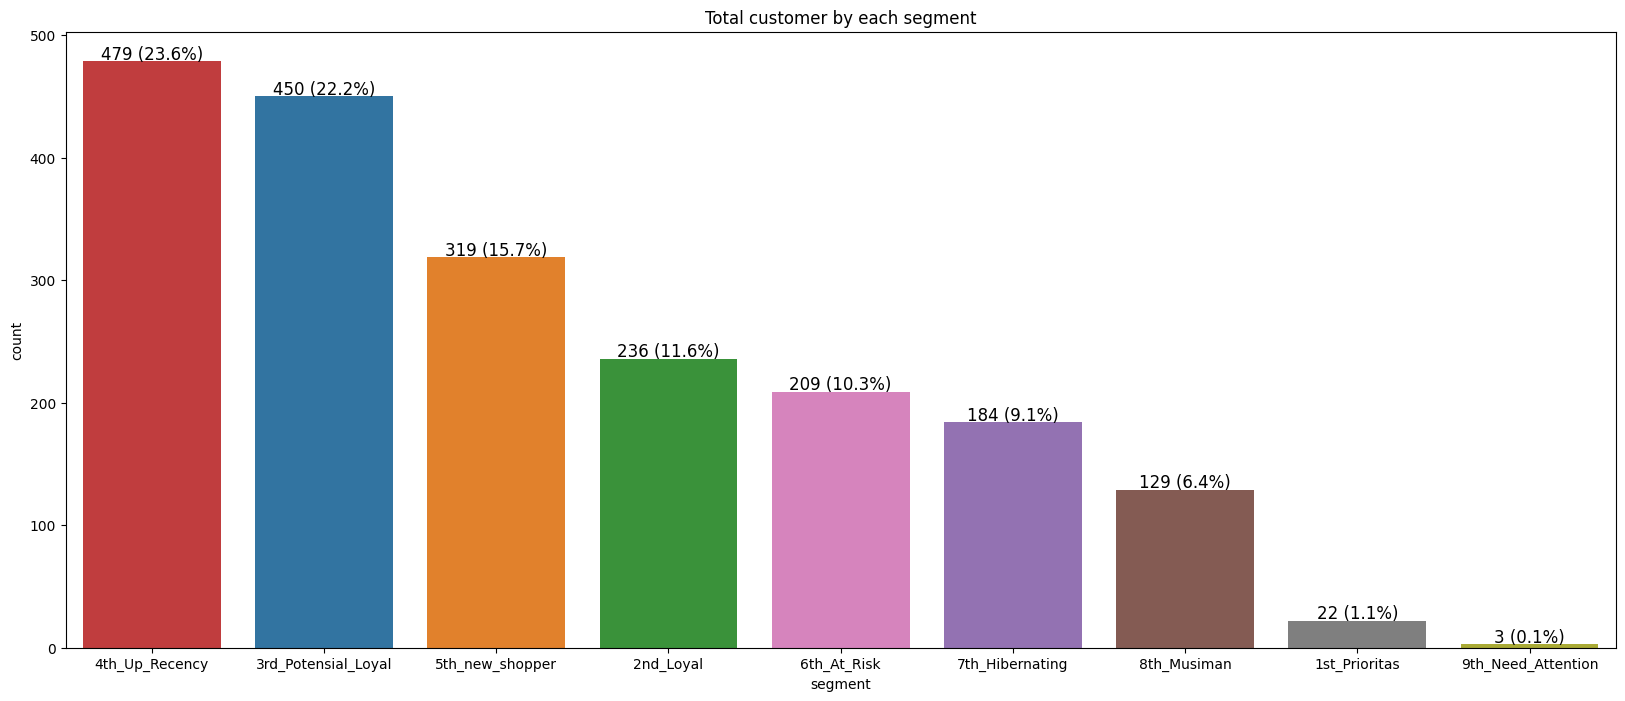

Melalui grafik total customer by each segment kita dapat melihat sebaran segmentasi kustomer yang terbagi dari tiap proporsi yang ada. 

**Posisi pertama** di tempati oleh **4th_Up_Recency sebesar 23.6%** dengan karakteristik low recency, high frequcy & high monetary. Untuk menjaga rententio customer dengan behaviour seperti ini kita dapat melakukan customer survey, yaitu adalah dengan follow up kenapa belum melakukan pembelian kembali, tindakan follow up seperti ini dapat membantu **management pihak pertama** dalam mengidentifikasi permasalahan yang dialami jenis kustomer tersebut agar lebih terbuka apabila hal yang dirasa menghalangi proses mereka melakukan transaksi semisal dibuatkan customer special order. karena pada umumnya mereka memiliki monetary yang tinggi salah satunya adalah faktor ketersediaan barang, yang tentunya dapat dipersiapkan terlebih dahulu oleh management

**Posisi Kedua** yaitu segmen **3rd_Potensial_Loyal sebesar 22.2%** memiliki karakteristik belanja menengah dari segi recency, frequency dan monetary. Dengan kemampuan beli yang cukup besar, secara konsisten melakukan pembelian dengan jumlah monetary yang memungkinkan membeli lebih banyak dengan di terapkannya bundling product. 

**Posisi Ketiga** dengan presentase sebesar **15.7% oleh 5th_new_shopper** memiliki recency tergolong baik, kecenderungan frekuensi spending, dan monetary yang rendah. karena kemungkinan masih membanding baindingkan harga produk dengan kompetitor. treatment yang kita lakukan memberikan diskon untuk pembelian ke 2 atau ke 3 dari transaksi terakhir.

**Posisi ke-empat** ditempati oleh **2nd_Loyal sebesar 11.6%** kelompok ini menduduki rank predikat kustomer dengan recency, frekuensi dan monetary sedikit dibawah dari yang terbaik. Memilki kemampuan beli dan dan frekuensi yang masih bisa di tingkatkan dengan treatment pembelian item yang serupa yang paling di beli oleh mereka.


**Posisi ke-lima** yaitu **6th_at_risk 10.3%** memiliki , waktu dari pembelanjaan terakhir yang cukup jauh menandakan kecenderungan pindah kepada kompetitor. dengan memberikan push notification, agar melakukan pembelian melalui diskon denga waktu berjangka.

# 7. Kesimpulan

- Penghematan **warehouse management inventory** dapat dilakukan dengan melakukan alokasi produk terhadap produk yang paling sering terjual, mengurangi potensial fixed cost dari keep inventory
- Segmentasi terbagi terhadap 9 kategori yaitu diantaranya diberikan rekomendasi spesifik bergantung terhadap karakteristik.
- Melalui analis ini ditemukan bahwa direct store purchase masih menjadi dominan untuk kanal penjualan. hal ini merupakan opportunity untuk meningkatkan kanal penjualan lainnya
- Hero product seperti Wines dan Meat dapat di secure dari rantai pasok sehingga kustomer tidak pindah kepada kompetitor
- total monetary sales dari gold, sweet, fruits tidak sebaik kedua hero product. pentingnya melakukan re-layout agar product placement dapat exposure yang cukup. semisal fruits di letakan di depan karena banyak warna dan menyegarkan, placement fish berdekatan dengan fruits serta sweets menyertainya.